## Proj_02 : Identify Customer Segments
- Source : UdaCity, Machine Learning Intro, Unsupervided Learning

## Introduction

In this project, you will apply unsupervised learning techniques to ****identify segments of the population that form the core customer base**** for a mail-order sales company in Germany.<br>
These segments can then be used to direct marketing campaings audiences that will have the highest expected rate of returns.<br>
The data that you will use has been provided by our partners at `Bertelsmann Arvato Analytics`, and represents a real-life data science task.

## Goal

****Each row**** of the demographics files represents ****a single person**** , but also includes information outside of individuals, including information about their household, building, and neighborhood. <br>

I will use this information to ****cluster the general population into groups**** with similar demographic properties. 
Then, I will see how the people in the customers dataset fit into those created clusters.<br> 

The hope here is that certain clusters are over-represented in the customers data, as compared to the general population; those over-represented clusters will be assumed to be part of the core userbase. This information can then be used for further applications, such as targeting for a marketing campaign.


## Overview of this project
<img src="./Data/Proj_02/UC_Proj_02.png"/>

<a id="mokuji_0"></a>
## Contents
1. [Exploring the Dataset](#mokuji_1)<br>
  1-1. [Data_Dictionary.md](#mokuji_1_1)<br>
  1-2. [AZDIAS_Feature_Summary.csv](#mokuji_1_2)<br>
  1-3. [UdaCity_AZDIAS_Subset.csv](#mokuji_1_3)<br>
  1-4. [Udacity_CUSTOMERS_Subset.csv](#mokuji_1_4)<br>
  <br>
2. [Preprocessing the Dataset](#mokuji_2)<br>
  2-1. [Convert Missing or Unknown Values to NANs](#mokuji_2_1)<br>
  2-2. [Discussions about Nan in Each Column](#mokuji_2_2)<br>
  2-3. [Discussions about Nan in Each Row](#mokuji_2_3)<br>
  2-4. [Discussions about Data Types](#mokuji_2_4)<br>
  2-5. [Encoding](#mokuji_2_5)<br>
      2-5-1. [Encoding : `categorical`](#mokuji_2_5_1)<br>
      2-5-2. [Encoding : `mixed`](#mokuji_2_5_2)<br>
  2-6. [Scaling](#mokuji_2_6)<br>
  2-7. [Cleaning Function](#mokuji_2_7)<br>
  <br>
3. [Dimensionality Reduction](#mokuji_3)<br>
  3-1. [PCA, First Trial](#mokuji_3_1)<br>
  3-2. [Check Out the PCA Results](#mokuji_3_2)<br>
  3-3. [PCA, Re-Fit](#mokuji_3_3)<br>
  <br>
4. [Clusterling](#mokuji_4)<br>
  4-1. [Apply Clustering to General Population](#mokuji_4_1)<br>
  4-2. [Apply All Steps to the Customer Data](#mokuji_4_2)<br>
  4-3. [Compare Customer Data to Demographics Data](#mokuji_4_3)<br>

In [1]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

In [2]:
# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from IPython.display import display

# show all observation-related columns/rows
pd.set_option('display.max_columns', 200)
pd.set_option('display.max_rows', 200)

<a id="mokuji_1"></a>
## [1. Exploring the Dataset](#mokuji_0)

There are four files in the directory "./Data/Proj_02"

1. Data_Dictionary.md
    - This file includes detail explanation of all features.
    - From this file, I found that main dataset of this project are `UdaCity_AZDIAS_Subset.csv` and `UdaCity_CUSTOMERS_Subset.csv`.
2. AZDIAS_Features_Summary.csv
    - Summary of feature attributes for demographics data. 
    - 85 features(rows) x 4 columns.
3. UdaCity_AZDIAS_Subset.csv
    - Demographics data for the general population of Germany.
    - 891211 persons(rows) x 85 features(columns).
4. UdaCity_CUSTOMERS_Subset.csv
    - Demographics data for customers of a mail-order company.
    - 191652 persons (rows) x 85 features (columns).

The fiture below is the relationship of data.
<img src="./Data/Proj_02/ER_01.PNG" width="450"/>

I will explore these dataset.



<a id="mokuji_1_1"></a>
### [1-1. Data_Dictionary.md](#mokuji_0)

Detailed information file about the features in the provided datasets.<br>
In `Data_Disctionary.md`, there are explanations for data.<br>
I show the contents example in the cell below.

In [3]:
# Import my libarary
from Library.my_common_tool import display_text_file
display_text_file("./Data/Proj_02/Data_Dictionary.md", line_start=33, line_end=51)

## 1. Person-level feature

### 1.1. AGER_TY
Best-ager typolog
- -1: unknow
-  0: no classification possibl
-  1: passive elderl
-  2: cultural elderl
-  3: experience-driven elderl

### 1.2. ALTERSKATEGORIE_GRO
Estimated age based on given name analysi
- -1: unknown (missing
-  0: unknown (cannot be determined
-  1: < 30 years ol
-  2: 30 - 45 years ol
-  3: 46 - 60 years ol
-  4: > 60 years ol
-  9: uniformly distribute


To get the relationship about `attribute` and `explanation` of `Data_Disctionary.md`, I convert `Data_Disctionary.md` into `Data_Disctionary.csv` and create the variable `my_dict`.

In [4]:
# Import my libarary
from Library.Proj_02.my_data_process import convert_dict_md_to_csv
#
# Convert .md to .csv
file_path_dict = "./Data/Proj_02/Data_Dictionary.md"
convert_dict_md_to_csv("./Data/Proj_02/Data_Dictionary.md")
#
my_dict = pd.read_csv("./Data/Proj_02/Data_Dictionary.csv", sep="\t")
display("my_dict size is {}".format(my_dict.shape))
display(my_dict.head(10))

'my_dict size is (85, 5)'

,id_1,id_2,id_3,attribute,explanation
0,1,1,101,AGER_TYP,Best-ager typology
1,1,2,102,ALTERSKATEGORIE_GROB,Estimated age based on given name analysis
2,1,3,103,ANREDE_KZ,Gender
3,1,4,104,CJT_GESAMTTYP,Customer-Journey-Typology: preferred informati...
4,1,5,105,FINANZ_MINIMALIST,"Financial typology, for each dimension:"
5,1,5,105,FINANZ_SPARER,"Financial typology, for each dimension:"
6,1,5,105,FINANZ_VORSORGER,"Financial typology, for each dimension:"
7,1,5,105,FINANZ_ANLEGER,"Financial typology, for each dimension:"
8,1,5,105,FINANZ_UNAUFFAELLIGER,"Financial typology, for each dimension:"
9,1,5,105,FINANZ_HAUSBAUER,"Financial typology, for each dimension:"


<a id="mokuji_1_2"></a>
### [1-2. AZDIAS_Feature_Summary.csv](#mokuji_0)

Summary of feature attributes for demographics data.

In [5]:
feat_info = pd.read_csv("./Data/Proj_02/AZDIAS_Feature_Summary.csv", sep=";")
display(feat_info.shape)
display(feat_info.head(10))

(85, 4)

,attribute,information_level,type,missing_or_unknown
0,AGER_TYP,person,categorical,"[-1,0]"
1,ALTERSKATEGORIE_GROB,person,ordinal,"[-1,0,9]"
2,ANREDE_KZ,person,categorical,"[-1,0]"
3,CJT_GESAMTTYP,person,categorical,[0]
4,FINANZ_MINIMALIST,person,ordinal,[-1]
5,FINANZ_SPARER,person,ordinal,[-1]
6,FINANZ_VORSORGER,person,ordinal,[-1]
7,FINANZ_ANLEGER,person,ordinal,[-1]
8,FINANZ_UNAUFFAELLIGER,person,ordinal,[-1]
9,FINANZ_HAUSBAUER,person,ordinal,[-1]


In [6]:
# Count Nans
print("Number of Nans")
print("--------------------------")
feat_info.isnull().sum(axis=0)

Number of Nans
--------------------------


attribute             0
information_level     0
type                  0
missing_or_unknown    0
dtype: int64

In [7]:
# Import my library
from Library.my_common_tool import display_unique_values
#
print("Unique Values")
col_names_of_string_value = ["attribute", "information_level", "type", "missing_or_unknown"]
display_unique_values(feat_info, col_names_of_string_value)

Unique Values
--------------------------
0. [attribute] : unique value num = 85
AGER_TYP, ALTERSKATEGORIE_GROB, ANREDE_KZ, CJT_GESAMTTYP, FINANZ_MINIMALIST, FINANZ_SPARER, FINANZ_VORSORGER, FINANZ_ANLEGER, FINANZ_UNAUFFAELLIGER, FINANZ_HAUSBAUER, FINANZTYP, GEBURTSJAHR, GFK_URLAUBERTYP, GREEN_AVANTGARDE, HEALTH_TYP, LP_LEBENSPHASE_FEIN, LP_LEBENSPHASE_GROB, LP_FAMILIE_FEIN, LP_FAMILIE_GROB, LP_STATUS_FEIN, LP_STATUS_GROB, NATIONALITAET_KZ, PRAEGENDE_JUGENDJAHRE, RETOURTYP_BK_S, SEMIO_SOZ, SEMIO_FAM, SEMIO_REL, SEMIO_MAT, SEMIO_VERT, SEMIO_LUST, SEMIO_ERL, SEMIO_KULT, SEMIO_RAT, SEMIO_KRIT, SEMIO_DOM, SEMIO_KAEM, SEMIO_PFLICHT, SEMIO_TRADV, SHOPPER_TYP, SOHO_KZ, TITEL_KZ, VERS_TYP, ZABEOTYP, ALTER_HH, ANZ_PERSONEN, ANZ_TITEL, HH_EINKOMMEN_SCORE, KK_KUNDENTYP, W_KEIT_KIND_HH, WOHNDAUER_2008, ANZ_HAUSHALTE_AKTIV, ANZ_HH_TITEL, GEBAEUDETYP, KONSUMNAEHE, MIN_GEBAEUDEJAHR, OST_WEST_KZ, WOHNLAGE, CAMEO_DEUG_2015, CAMEO_DEU_2015, CAMEO_INTL_2015, KBA05_ANTG1, KBA05_ANTG2, KBA05_ANTG3, KBA05_AN

<a id="mokuji_1_3"></a>
### [1-3. UdaCity_AZDIAS_Subset.csv](#mokuji_0)

Demographics data for the general population of Germany.

In [8]:
azdias = pd.read_csv("./Data/Proj_02/Udacity_AZDIAS_Subset.csv", sep=";")
display(azdias.shape)
display(azdias.head(10))

(891221, 85)

,AGER_TYP,ALTERSKATEGORIE_GROB,ANREDE_KZ,CJT_GESAMTTYP,FINANZ_MINIMALIST,FINANZ_SPARER,FINANZ_VORSORGER,FINANZ_ANLEGER,FINANZ_UNAUFFAELLIGER,FINANZ_HAUSBAUER,FINANZTYP,GEBURTSJAHR,GFK_URLAUBERTYP,GREEN_AVANTGARDE,HEALTH_TYP,LP_LEBENSPHASE_FEIN,LP_LEBENSPHASE_GROB,LP_FAMILIE_FEIN,LP_FAMILIE_GROB,LP_STATUS_FEIN,LP_STATUS_GROB,NATIONALITAET_KZ,PRAEGENDE_JUGENDJAHRE,RETOURTYP_BK_S,SEMIO_SOZ,SEMIO_FAM,SEMIO_REL,SEMIO_MAT,SEMIO_VERT,SEMIO_LUST,SEMIO_ERL,SEMIO_KULT,SEMIO_RAT,SEMIO_KRIT,SEMIO_DOM,SEMIO_KAEM,SEMIO_PFLICHT,SEMIO_TRADV,SHOPPER_TYP,SOHO_KZ,TITEL_KZ,VERS_TYP,ZABEOTYP,ALTER_HH,ANZ_PERSONEN,ANZ_TITEL,HH_EINKOMMEN_SCORE,KK_KUNDENTYP,W_KEIT_KIND_HH,WOHNDAUER_2008,ANZ_HAUSHALTE_AKTIV,ANZ_HH_TITEL,GEBAEUDETYP,KONSUMNAEHE,MIN_GEBAEUDEJAHR,OST_WEST_KZ,WOHNLAGE,CAMEO_DEUG_2015,CAMEO_DEU_2015,CAMEO_INTL_2015,KBA05_ANTG1,KBA05_ANTG2,KBA05_ANTG3,KBA05_ANTG4,KBA05_BAUMAX,KBA05_GBZ,BALLRAUM,EWDICHTE,INNENSTADT,GEBAEUDETYP_RASTER,KKK,MOBI_REGIO,ONLINE_AFFINITAET,REGIOTYP,KBA13_ANZAHL_PKW,PLZ8_ANTG1,PLZ8_ANTG2,PLZ8_ANTG3,PLZ8_ANTG4,PLZ8_BAUMAX,PLZ8_HHZ,PLZ8_GBZ,ARBEIT,ORTSGR_KLS9,RELAT_AB
0,-1,2,1,2.0,3,4,3,5,5,3,4,0,10.0,0,-1,15.0,4.0,2.0,2.0,1.0,1.0,0,0,5.0,2,6,7,5,1,5,3,3,4,7,6,6,5,3,-1,NaN,NaN,-1,3,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,-1,1,2,5.0,1,5,2,5,4,5,1,1996,10.0,0,3,21.0,6.0,5.0,3.0,2.0,1.0,1,14,1.0,5,4,4,3,1,2,2,3,6,4,7,4,7,6,3,1.0,0.0,2,5,0.0,2.0,0.0,6.0,NaN,3.0,9.0,11.0,0.0,8.0,1.0,1992.0,W,4.0,8,8A,51,0.0,0.0,0.0,2.0,5.0,1.0,6.0,3.0,8.0,3.0,2.0,1.0,3.0,3.0,963.0,2.0,3.0,2.0,1.0,1.0,5.0,4.0,3.0,5.0,4.0
2,-1,3,2,3.0,1,4,1,2,3,5,1,1979,10.0,1,3,3.0,1.0,1.0,1.0,3.0,2.0,1,15,3.0,4,1,3,3,4,4,6,3,4,7,7,7,3,3,2,0.0,0.0,1,5,17.0,1.0,0.0,4.0,NaN,3.0,9.0,10.0,0.0,1.0,5.0,1992.0,W,2.0,4,4C,24,1.0,3.0,1.0,0.0,0.0,3.0,2.0,4.0,4.0,4.0,2.0,3.0,2.0,2.0,712.0,3.0,3.0,1.0,0.0,1.0,4.0,4.0,3.0,5.0,2.0
3,2,4,2,2.0,4,2,5,2,1,2,6,1957,1.0,0,2,0.0,0.0,0.0,0.0,9.0,4.0,1,8,2.0,5,1,2,1,4,4,7,4,3,4,4,5,4,4,1,0.0,0.0,1,3,13.0,0.0,0.0,1.0,NaN,NaN,9.0,1.0,0.0,1.0,4.0,1997.0,W,7.0,2,2A,12,4.0,1.0,0.0,0.0,1.0,4.0,4.0,2.0,6.0,4.0,0.0,4.0,1.0,0.0,596.0,2.0,2.0,2.0,0.0,1.0,3.0,4.0,2.0,3.0,3.0
4,-1,3,1,5.0,4,3,4,1,3,2,5,1963,5.0,0,3,32.0,10.0,10.0,5.0,3.0,2.0,1,8,5.0,6,4,4,2,7,4,4,6,2,3,2,2,4,2,2,0.0,0.0,2,4,20.0,4.0,0.0,5.0,1.0,2.0,9.0,3.0,0.0,1.0,4.0,1992.0,W,3.0,6,6B,43,1.0,4.0,1.0,0.0,0.0,3.0,2.0,5.0,1.0,5.0,3.0,3.0,5.0,5.0,435.0,2.0,4.0,2.0,1.0,2.0,3.0,3.0,4.0,6.0,5.0
5,3,1,2,2.0,3,1,5,2,2,5,2,1943,1.0,0,3,8.0,2.0,1.0,1.0,4.0,2.0,1,3,3.0,2,4,7,4,2,2,2,5,7,4,4,4,7,6,0,0.0,0.0,2,4,10.0,1.0,0.0,5.0,3.0,6.0,9.0,5.0,0.0,1.0,5.0,1992.0,W,7.0,8,8C,54,2.0,2.0,0.0,0.0,0.0,4.0,6.0,2.0,7.0,4.0,4.0,4.0,1.0,5.0,1300.0,2.0,3.0,1.0,1.0,1.0,5.0,5.0,2.0,3.0,3.0
6,-1,2,2,5.0,1,5,1,5,4,3,4,0,12.0,0,2,2.0,1.0,1.0,1.0,2.0,1.0,1,10,4.0,2,5,5,7,2,6,5,5,7,7,4,7,7,7,1,0.0,0.0,1,4,0.0,1.0,0.0,6.0,NaN,3.0,9.0,4.0,0.0,1.0,5.0,1992.0,W,5.0,4,4A,22,3.0,2.0,0.0,0.0,1.0,3.0,6.0,4.0,3.0,5.0,3.0,5.0,2.0,5.0,867.0,3.0,3.0,1.0,0.0,1.0,5.0,5.0,4.0,6.0,3.0
7,-1,1,1,3.0,3,3,4,1,3,2,5,1964,9.0,0,1,5.0,2.0,1.0,1.0,1.0,1.0,1,8,5.0,7,7,7,5,6,2,2,7,5,1,1,2,5,5,0,0.0,0.0,1,1,14.0,1.0,0.0,4.0,NaN,5.0,9.0,6.0,0.0,8.0,3.0,1992.0,W,1.0,2,2D,14,2.0,2.0,0.0,0.0,0.0,4.0,2.0,5.0,3.0,4.0,1.0,4.0,1.0,1.0,758.0,3.0,3.0,1.0,0.0,1.0,4.0,4.0,2.0,5.0,2.0
8,-1,3,1,3.0,4,4,2,4,2,2,6,1974,3.0,1,3,10.0,3.0,1.0,1.0,10.0,5.0,1,11,4.0,4,5,4,1,5,6,4,5,2,5,5,3,1,4,3,0.0,0.0,2,6,16.0,1.0,0.0,3.0,NaN,5.0,8.0,2.0,1.0,3.0,4.0,1992.0,W,1.0,1,1A,13,1.0,1.0,0.0,0.0,0.0,5.0,3.0,4.0,4.0,4.0,1.0,3.0,2.0,3.0,511.0,2.0,3.0,2.0,1.0,1.0,3.0,3.0,2.0,4.0,3.0
9,-1,3,2,4.0,2,4,2,3,5,4,1,1975,12.0,1,2,4.0,1.0,1.0,1.0,3.0,2.0,1,15,4.0,2,1,1,3,2,6,6,3,4,7,6,7,1,3,3,0.0,0.0,2,4,17.0,1.0,0.0,4.0,6.0,4.0,3.0,9.0,0.0,3.0,4.0,1992.0,W,7.0,1,1E,15,1.0,3.0,1.0,0.0,0.0,2.0,6.0,5.0,4.0,3.0,1.0,3.0,3.0,1.0,530.0,2.0,3.0,2.0,1.0,1.0,3.0,3.0,2.0,3.0,1.0


I seek how may Nan is there in each `column` of `azdias`.

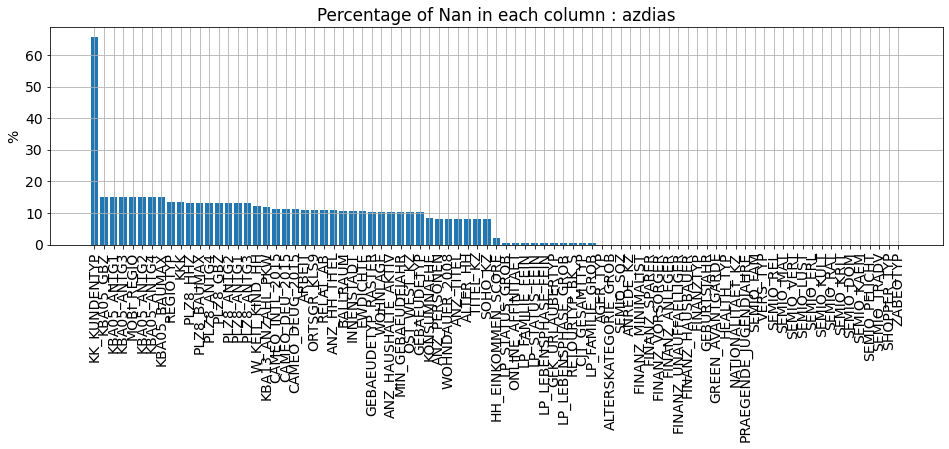

In [9]:
# Count Nans
from Library.my_common_tool import plot_nan_ratio_each_column, plot_nan_ratio_each_row
title = "Percentage of Nan in each column : azdias"
plot_nan_ratio_each_column(azdias, title,figsize=(16,4),fontsize=14,bRemoveZeroNanData=False);

In the cell below, there are some data which have big value.<br>
So, I think that normalization will be needed.

(0.0, 100.0)

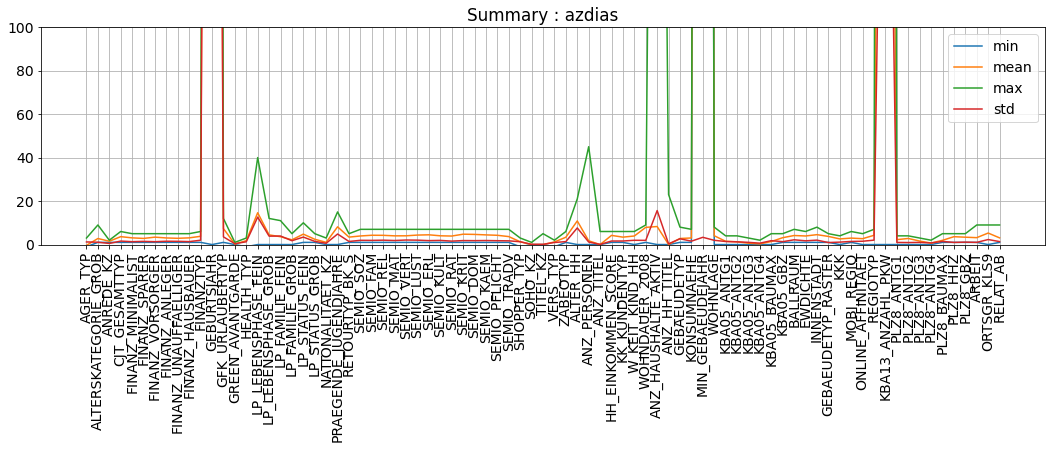

In [10]:
# Import my library
from Library.my_common_tool import plot_summary

# Show Data Summary
title = "Summary : azdias"
fig = plot_summary(azdias, title,figsize=(18,4),fontsize=14)
plt.figure(fig)
plt.ylim((0,100))

<a id="mokuji_1_4"></a>
### [1-4. Udacity_CUSTOMERS_Subset.csv](#mokuji_0)

Demographics data for customers of a mail-order company.

In [11]:
customers = pd.read_csv("./Data/Proj_02/Udacity_CUSTOMERS_Subset.csv", sep=";")
display(customers.shape)
display(customers.head(5))

(191652, 85)

,AGER_TYP,ALTERSKATEGORIE_GROB,ANREDE_KZ,CJT_GESAMTTYP,FINANZ_MINIMALIST,FINANZ_SPARER,FINANZ_VORSORGER,FINANZ_ANLEGER,FINANZ_UNAUFFAELLIGER,FINANZ_HAUSBAUER,FINANZTYP,GEBURTSJAHR,GFK_URLAUBERTYP,GREEN_AVANTGARDE,HEALTH_TYP,LP_LEBENSPHASE_FEIN,LP_LEBENSPHASE_GROB,LP_FAMILIE_FEIN,LP_FAMILIE_GROB,LP_STATUS_FEIN,LP_STATUS_GROB,NATIONALITAET_KZ,PRAEGENDE_JUGENDJAHRE,RETOURTYP_BK_S,SEMIO_SOZ,SEMIO_FAM,SEMIO_REL,SEMIO_MAT,SEMIO_VERT,SEMIO_LUST,SEMIO_ERL,SEMIO_KULT,SEMIO_RAT,SEMIO_KRIT,SEMIO_DOM,SEMIO_KAEM,SEMIO_PFLICHT,SEMIO_TRADV,SHOPPER_TYP,SOHO_KZ,TITEL_KZ,VERS_TYP,ZABEOTYP,ALTER_HH,ANZ_PERSONEN,ANZ_TITEL,HH_EINKOMMEN_SCORE,KK_KUNDENTYP,W_KEIT_KIND_HH,WOHNDAUER_2008,ANZ_HAUSHALTE_AKTIV,ANZ_HH_TITEL,GEBAEUDETYP,KONSUMNAEHE,MIN_GEBAEUDEJAHR,OST_WEST_KZ,WOHNLAGE,CAMEO_DEUG_2015,CAMEO_DEU_2015,CAMEO_INTL_2015,KBA05_ANTG1,KBA05_ANTG2,KBA05_ANTG3,KBA05_ANTG4,KBA05_BAUMAX,KBA05_GBZ,BALLRAUM,EWDICHTE,INNENSTADT,GEBAEUDETYP_RASTER,KKK,MOBI_REGIO,ONLINE_AFFINITAET,REGIOTYP,KBA13_ANZAHL_PKW,PLZ8_ANTG1,PLZ8_ANTG2,PLZ8_ANTG3,PLZ8_ANTG4,PLZ8_BAUMAX,PLZ8_HHZ,PLZ8_GBZ,ARBEIT,ORTSGR_KLS9,RELAT_AB
0,2,4,1,5.0,5,1,5,1,2,2,2,0,4.0,1,1,20.0,5.0,2.0,2.0,10.0,5.0,1,4,5.0,6,5,2,6,6,7,3,4,1,3,1,1,2,1,3,0.0,0.0,1,3,10.0,2.0,0.0,1.0,NaN,6.0,9.0,1.0,0.0,1.0,5.0,1992.0,W,7.0,1,1A,13,2.0,2.0,0.0,0.0,0.0,4.0,3.0,2.0,4.0,4.0,1.0,4.0,3.0,1.0,1201.0,3.0,3.0,1.0,0.0,1.0,5.0,5.0,1.0,2.0,1.0
1,-1,4,1,NaN,5,1,5,1,3,2,2,0,NaN,0,1,NaN,NaN,NaN,NaN,NaN,NaN,1,0,NaN,3,6,2,6,7,5,3,4,1,3,3,2,4,1,3,0.0,0.0,1,3,11.0,3.0,0.0,NaN,NaN,0.0,9.0,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,-1,4,2,2.0,5,1,5,1,4,4,2,0,3.0,1,2,13.0,3.0,1.0,1.0,10.0,5.0,1,4,5.0,2,2,1,3,3,7,7,1,2,7,5,6,4,1,1,0.0,0.0,2,3,6.0,1.0,0.0,1.0,NaN,6.0,9.0,1.0,0.0,8.0,1.0,1992.0,W,2.0,5,5D,34,2.0,2.0,0.0,0.0,0.0,3.0,7.0,4.0,1.0,3.0,3.0,3.0,1.0,7.0,433.0,2.0,3.0,3.0,1.0,3.0,3.0,2.0,3.0,5.0,3.0
3,1,4,1,2.0,5,1,5,2,1,2,6,0,10.0,0,2,0.0,0.0,0.0,0.0,9.0,4.0,1,1,3.0,6,5,3,4,7,5,3,4,3,3,3,3,3,4,0,0.0,0.0,1,1,8.0,0.0,0.0,4.0,NaN,NaN,9.0,0.0,NaN,2.0,2.0,1992.0,W,7.0,4,4C,24,3.0,0.0,0.0,0.0,1.0,4.0,7.0,1.0,7.0,4.0,3.0,4.0,2.0,6.0,755.0,3.0,2.0,1.0,0.0,1.0,3.0,4.0,1.0,3.0,1.0
4,-1,3,1,6.0,3,1,4,4,5,2,2,1960,2.0,0,3,31.0,10.0,10.0,5.0,1.0,1.0,1,8,5.0,4,5,4,6,5,6,4,5,5,3,5,2,5,4,1,0.0,0.0,2,1,20.0,4.0,0.0,6.0,2.0,2.0,9.0,7.0,0.0,3.0,1.0,1992.0,W,3.0,7,7B,41,0.0,3.0,2.0,0.0,0.0,3.0,3.0,4.0,4.0,3.0,4.0,3.0,5.0,7.0,513.0,2.0,4.0,2.0,1.0,2.0,3.0,3.0,3.0,5.0,1.0


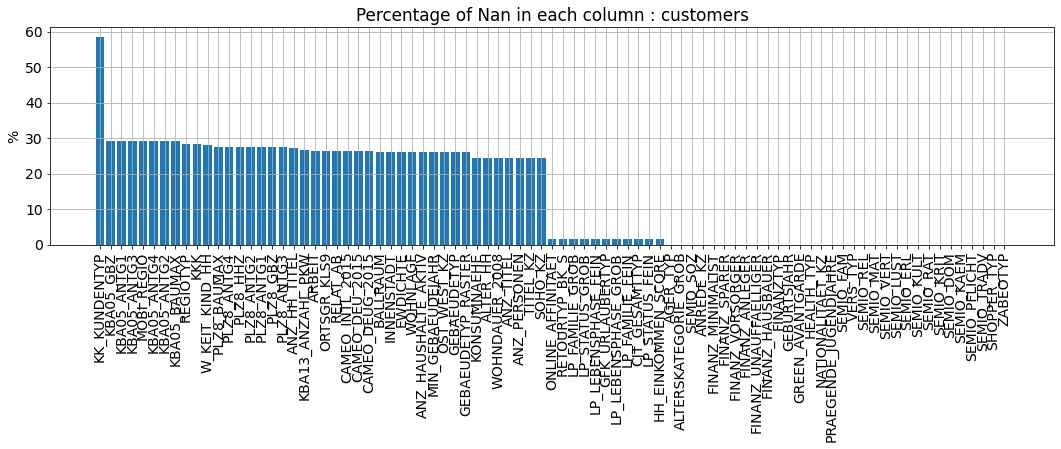

In [12]:
# Count Nans
title = "Percentage of Nan in each column : customers"
plot_nan_ratio_each_column(customers, title,figsize=(18,4),fontsize=14,bRemoveZeroNanData=False);

(0.0, 100.0)

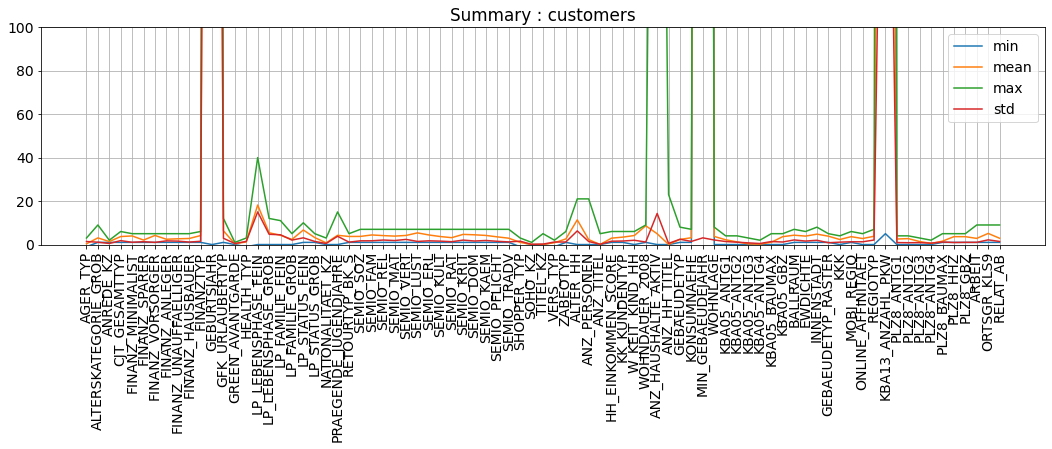

In [13]:
# Show Data Summary
title = "Summary : customers"
fig = plot_summary(customers, title,figsize=(18,4),fontsize=14)
plt.figure(fig)
plt.ylim((0,100))

<a id="mokuji_2"></a>
## [2. Preprocessing the Dataset](#mokuji_0)

In this section, I will process following below:
1. Convert Missing or Unknown Values to NANs
    - `missing_or_unknow` of `feat_info` are used as a flag to find data which have no meaning.
    - `azdias` will be modified according to the flag(`missing_or_unknow`).
2. Assess Nan in Each Column
    - I want to know how to treat nan. So, I visualize the percentage of nan.
    - I will show features which do not have nan.
    - I will drop features which have too much nan.
3. Encoding non-numecial data
    - Features of `azdias` whose `type` are `categorical` or `mixed` are non-numerical. So, I preprocess them with one-hot encoding.

<a id="mokuji_2_1"></a>
### [2-1. Convert Missing or Unknown Values to NANs](#mokuji_0)

From the cell above, unique values of `missing_or_unkown` of `feat_info` are <br>
[-1,0], [-1,0,9], [0], [-1], [], [-1,9], [-1,X], [XX], [-1,XX].<br>
The types of these alues are string. So, I will process `azdias` folloing below:
1. I get a integer `value A` from strings (`[-1,0], [-1,0,9], [0], [-1], [], [-1,9], [-1,X], [XX], [-1,XX]`)
2. `value A` is `missing` or `unknow`, so `value A` has no meaning. I will replace `value A` in `azdias` of `np.nan`.

In the next cell, I implement the function to convert.

In [14]:
def conv_miss_to_nan(feat_info, df):
    for id_feat in range(feat_info.shape[0]):
        feature_name = feat_info["attribute"][id_feat]
        miss_string  = feat_info["missing_or_unknown"][id_feat]
        
        if feature_name not in df.columns:
            continue
        
        # replace unnecessary string
        miss_string = miss_string.replace("[", "")
        miss_string = miss_string.replace("]", "")
        miss_string = miss_string.replace(" ", "")
        
        # split string
        miss_string_list = miss_string.split(",")
        
        # replace "miss value" to "np.nan"
        for tmp_str in miss_string_list:
            if(tmp_str == "X") or (tmp_str == "XX"):
                df[feature_name] = df[feature_name].replace(tmp_str, np.nan)
                #print("{} / Find X or XX : {}".format(feature_name, tmp_str))
            elif (len(tmp_str)==0):
                df[feature_name] = df[feature_name].replace(tmp_value, np.nan)
                #print("{} / Find Empty".format(feature_name))
            else:
                tmp_value = int(tmp_str)
                df[feature_name] = df[feature_name].replace(tmp_value, np.nan)
                #print("{} / Find {}".format(feature_name,tmp_value))
    #
    return df

In [15]:
def display_unique_values(df):
    for column_name in df.columns:
        print("{} : {}".format(column_name, df[column_name].unique()))

In [16]:
print("Number of NAN : Before converting missing to nan")
azdias.isnull().sum(axis=0).sum()

Number of NAN : Before converting missing to nan


4896838

In [17]:
azdias.head()

,AGER_TYP,ALTERSKATEGORIE_GROB,ANREDE_KZ,CJT_GESAMTTYP,FINANZ_MINIMALIST,FINANZ_SPARER,FINANZ_VORSORGER,FINANZ_ANLEGER,FINANZ_UNAUFFAELLIGER,FINANZ_HAUSBAUER,FINANZTYP,GEBURTSJAHR,GFK_URLAUBERTYP,GREEN_AVANTGARDE,HEALTH_TYP,LP_LEBENSPHASE_FEIN,LP_LEBENSPHASE_GROB,LP_FAMILIE_FEIN,LP_FAMILIE_GROB,LP_STATUS_FEIN,LP_STATUS_GROB,NATIONALITAET_KZ,PRAEGENDE_JUGENDJAHRE,RETOURTYP_BK_S,SEMIO_SOZ,SEMIO_FAM,SEMIO_REL,SEMIO_MAT,SEMIO_VERT,SEMIO_LUST,SEMIO_ERL,SEMIO_KULT,SEMIO_RAT,SEMIO_KRIT,SEMIO_DOM,SEMIO_KAEM,SEMIO_PFLICHT,SEMIO_TRADV,SHOPPER_TYP,SOHO_KZ,TITEL_KZ,VERS_TYP,ZABEOTYP,ALTER_HH,ANZ_PERSONEN,ANZ_TITEL,HH_EINKOMMEN_SCORE,KK_KUNDENTYP,W_KEIT_KIND_HH,WOHNDAUER_2008,ANZ_HAUSHALTE_AKTIV,ANZ_HH_TITEL,GEBAEUDETYP,KONSUMNAEHE,MIN_GEBAEUDEJAHR,OST_WEST_KZ,WOHNLAGE,CAMEO_DEUG_2015,CAMEO_DEU_2015,CAMEO_INTL_2015,KBA05_ANTG1,KBA05_ANTG2,KBA05_ANTG3,KBA05_ANTG4,KBA05_BAUMAX,KBA05_GBZ,BALLRAUM,EWDICHTE,INNENSTADT,GEBAEUDETYP_RASTER,KKK,MOBI_REGIO,ONLINE_AFFINITAET,REGIOTYP,KBA13_ANZAHL_PKW,PLZ8_ANTG1,PLZ8_ANTG2,PLZ8_ANTG3,PLZ8_ANTG4,PLZ8_BAUMAX,PLZ8_HHZ,PLZ8_GBZ,ARBEIT,ORTSGR_KLS9,RELAT_AB
0,-1,2,1,2.0,3,4,3,5,5,3,4,0,10.0,0,-1,15.0,4.0,2.0,2.0,1.0,1.0,0,0,5.0,2,6,7,5,1,5,3,3,4,7,6,6,5,3,-1,NaN,NaN,-1,3,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,-1,1,2,5.0,1,5,2,5,4,5,1,1996,10.0,0,3,21.0,6.0,5.0,3.0,2.0,1.0,1,14,1.0,5,4,4,3,1,2,2,3,6,4,7,4,7,6,3,1.0,0.0,2,5,0.0,2.0,0.0,6.0,NaN,3.0,9.0,11.0,0.0,8.0,1.0,1992.0,W,4.0,8,8A,51,0.0,0.0,0.0,2.0,5.0,1.0,6.0,3.0,8.0,3.0,2.0,1.0,3.0,3.0,963.0,2.0,3.0,2.0,1.0,1.0,5.0,4.0,3.0,5.0,4.0
2,-1,3,2,3.0,1,4,1,2,3,5,1,1979,10.0,1,3,3.0,1.0,1.0,1.0,3.0,2.0,1,15,3.0,4,1,3,3,4,4,6,3,4,7,7,7,3,3,2,0.0,0.0,1,5,17.0,1.0,0.0,4.0,NaN,3.0,9.0,10.0,0.0,1.0,5.0,1992.0,W,2.0,4,4C,24,1.0,3.0,1.0,0.0,0.0,3.0,2.0,4.0,4.0,4.0,2.0,3.0,2.0,2.0,712.0,3.0,3.0,1.0,0.0,1.0,4.0,4.0,3.0,5.0,2.0
3,2,4,2,2.0,4,2,5,2,1,2,6,1957,1.0,0,2,0.0,0.0,0.0,0.0,9.0,4.0,1,8,2.0,5,1,2,1,4,4,7,4,3,4,4,5,4,4,1,0.0,0.0,1,3,13.0,0.0,0.0,1.0,NaN,NaN,9.0,1.0,0.0,1.0,4.0,1997.0,W,7.0,2,2A,12,4.0,1.0,0.0,0.0,1.0,4.0,4.0,2.0,6.0,4.0,0.0,4.0,1.0,0.0,596.0,2.0,2.0,2.0,0.0,1.0,3.0,4.0,2.0,3.0,3.0
4,-1,3,1,5.0,4,3,4,1,3,2,5,1963,5.0,0,3,32.0,10.0,10.0,5.0,3.0,2.0,1,8,5.0,6,4,4,2,7,4,4,6,2,3,2,2,4,2,2,0.0,0.0,2,4,20.0,4.0,0.0,5.0,1.0,2.0,9.0,3.0,0.0,1.0,4.0,1992.0,W,3.0,6,6B,43,1.0,4.0,1.0,0.0,0.0,3.0,2.0,5.0,1.0,5.0,3.0,3.0,5.0,5.0,435.0,2.0,4.0,2.0,1.0,2.0,3.0,3.0,4.0,6.0,5.0


In [18]:
# Conver missing to nan
azdias = conv_miss_to_nan(feat_info, azdias)

print("Number of NAN : After converting missing to nan")
azdias.isnull().sum(axis=0).sum()

Number of NAN : After converting missing to nan


10774592

In [19]:
display_unique_values(azdias)

AGER_TYP : [nan  2.  3.  1.]
ALTERSKATEGORIE_GROB : [ 2.  1.  3.  4. nan]
ANREDE_KZ : [1 2]
CJT_GESAMTTYP : [ 2.  5.  3.  4.  1.  6. nan]
FINANZ_MINIMALIST : [3 1 4 2 5]
FINANZ_SPARER : [4 5 2 3 1]
FINANZ_VORSORGER : [3 2 1 5 4]
FINANZ_ANLEGER : [5 2 1 4 3]
FINANZ_UNAUFFAELLIGER : [5 4 3 1 2]
FINANZ_HAUSBAUER : [3 5 2 4 1]
FINANZTYP : [4 1 6 5 2 3]
GEBURTSJAHR : [  nan 1996. 1979. 1957. 1963. 1943. 1964. 1974. 1975. 1941. 1993. 1946.
 1988. 1991. 1966. 1949. 1982. 1972. 1990. 1985. 1989. 1948. 1935. 1997.
 1994. 1987. 2002. 1950. 1965. 1969. 1978. 1958. 1944. 1967. 1977. 1960.
 1970. 1973. 1971. 1937. 1947. 1926. 1954. 1981. 1962. 1992. 2008. 1976.
 1928. 1927. 1968. 1940. 1952. 1961. 2006. 1938. 1945. 1942. 1984. 1930.
 1980. 1959. 1986. 1931. 1955. 1983. 2010. 1951. 1921. 1929. 1939. 2001.
 1995. 1956. 1953. 2012. 1934. 1913. 1914. 1922. 2004. 1936. 2009. 1915.
 2003. 2013. 1998. 2007. 1932. 2005. 1923. 1925. 2015. 1933. 2017. 2000.
 1999. 2014. 1920. 1918. 1924. 2016. 2011. 1908. 19

<a id="mokuji_2_2"></a>
### [2-2. Discussions about Nan in Each Column](#mokuji_0)

I will visualize how may Nan is there in each `column` of `azdias`.
From the graph below, I see that 
  - From Fig-2-1
    - Top 6 features(`TITEL_KZ`, `AGER_TYP`, `KK_KUNDENTYP`, `KBA05_BAUMAX`, `GEBURTSJAHR`,`ALTER_HH`) have large percentage of nan. Other data have only less than 20% of nan.
    - I will drop 6 features.
  - From Fig-2-2
    - Features which have no nan are belonged to the `information_level` **person**.

Fig-2-1.


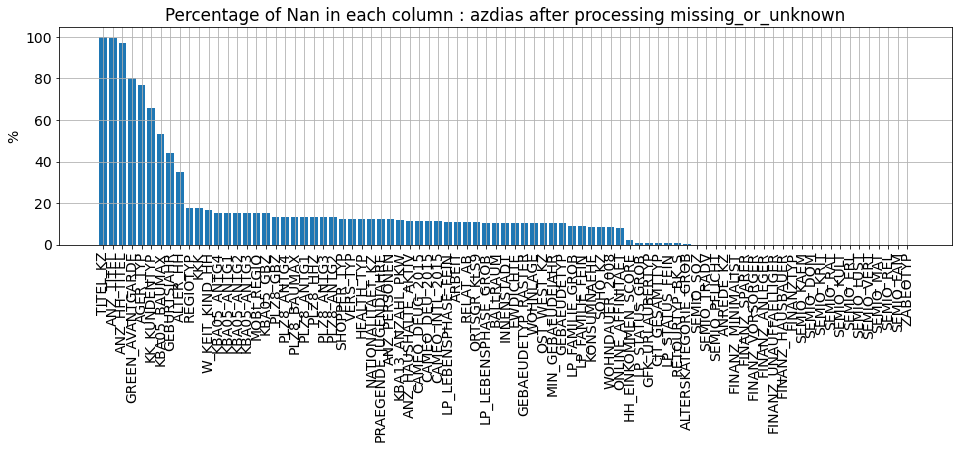

In [20]:
print("Fig-2-1.")
title = "Percentage of Nan in each column : azdias after processing missing_or_unknown"
fig, ser_nan_count_azdias = plot_nan_ratio_each_column(azdias, title,figsize=(16,4),fontsize=14,bRemoveZeroNanData=False);

In [21]:
print("Fig-2-2.")
ser_nan_count_azdias.rename("percent_of_nan")
df_nan_count_azdias = pd.DataFrame(ser_nan_count_azdias, columns=["percent_of_nan"])
df_nan_count_azdias["attribute"] = df_nan_count_azdias.index
feat_info2 = pd.merge(feat_info, df_nan_count_azdias, on="attribute", how="left")
feat_info2.sort_values(by=["percent_of_nan"], ascending=False, inplace=True)
display(feat_info2.sort_values("type"))

Fig-2-2.


,attribute,information_level,type,missing_or_unknown,percent_of_nan
40,TITEL_KZ,person,categorical,"[-1,0]",99.757636
21,NATIONALITAET_KZ,person,categorical,"[-1,0]",12.153551
57,CAMEO_DEUG_2015,microcell_rr4,categorical,"[-1,X]",11.147852
58,CAMEO_DEU_2015,microcell_rr4,categorical,[XX],11.147852
55,OST_WEST_KZ,building,categorical,[-1],10.451729
52,GEBAEUDETYP,building,categorical,"[-1,0]",10.451729
18,LP_FAMILIE_GROB,person,categorical,[0],8.728699
41,VERS_TYP,person,categorical,[-1],12.476816
17,LP_FAMILIE_FEIN,person,categorical,[0],8.728699
20,LP_STATUS_GROB,person,categorical,[0],0.544646


### I will drop features( = columns ) which have large ratio of nan.

In [22]:
def remove_cols_with_nan(df, thresh_percentage):
    # get the percentage of nan
    ser_num_of_nan = df.isnull().sum(axis=0)
    ser_num_of_nan = ser_num_of_nan / df.shape[0] * 100
    # 
    col_names_necessary = ser_num_of_nan[ser_num_of_nan <= thresh_percentage].index
    col_names_to_drop   = list(ser_num_of_nan[ser_num_of_nan >  thresh_percentage].index)
    #
    df_to_drop   = df[col_names_to_drop]
    df_necessary = df[col_names_necessary]
    #
    print("col_names_to_drop = \n{}\n".format(col_names_to_drop))
    #
    return df_necessary, df_to_drop, col_names_to_drop

In [23]:
print("Data size before remove columns with nan = ", azdias.shape)

Data size before remove columns with nan =  (891221, 85)


In [24]:
azdias_mod, _, col_names_to_drop = remove_cols_with_nan(azdias, thresh_percentage=30.0)
print("Data size after remove columns with nan = ", azdias_mod.shape)

col_names_to_drop = 
['AGER_TYP', 'GEBURTSJAHR', 'GREEN_AVANTGARDE', 'TITEL_KZ', 'ALTER_HH', 'ANZ_TITEL', 'KK_KUNDENTYP', 'ANZ_HH_TITEL', 'KBA05_BAUMAX']

Data size after remove columns with nan =  (891221, 76)


<a id="mokuji_2_3"></a>
### [2-3. Discussions about Nan in Each Row](#mokuji_0)

Now I will perform a similar assessment for the rows of the dataset. <br>
How much data is missing in each row?

First I overview of percentage of Nan in each row.<br>
From the graph below, about **70%** of rows have no Nan.

Fig-2-4.


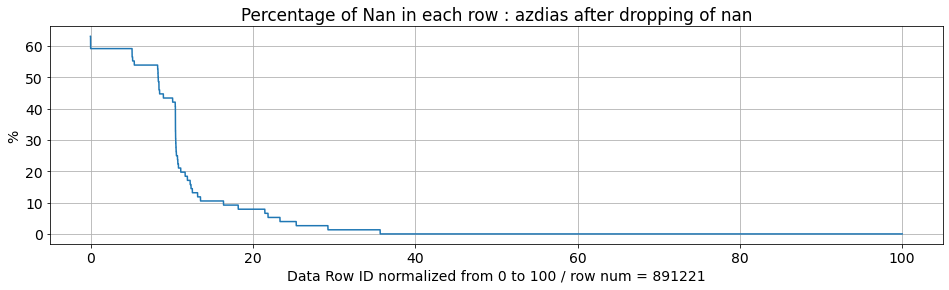

In [25]:
print("Fig-2-4.")
title = "Percentage of Nan in each row : azdias after dropping of nan"
res, ser_nan_count_azdias_each_row = plot_nan_ratio_each_row(azdias_mod, title,figsize=(16,4),fontsize=14,bRemoveZeroNanData=False);

If the distributions of non-missing features look similar between the data with missing values, I could argue that simply dropping those points from the analysis won't present a major issue.

On the other hand, if the data with missing values looks very different from the data with non-missing values, then I should make a note on those data as special.

So I separate `azdias_mod` to two dataset.
  - `azdias_wo_nan` : This dataset has no nan.
  - `azdias_w_nan`  : This dataset has nan.

In [26]:
def remove_rows_with_nan(df, thresh_percentage):
    # get the percentage of nan
    ser_num_of_nan = df.isnull().sum(axis=1)
    ser_num_of_nan = ser_num_of_nan / df.shape[1] * 100
    # 
    row_ids_wo_nan = ser_num_of_nan[ser_num_of_nan <= thresh_percentage].index
    row_ids_w_nan  = ser_num_of_nan[ser_num_of_nan >  thresh_percentage].index
    #
    df_wo_nan = df.iloc[row_ids_wo_nan, :]
    df_w_nan  = df.iloc[row_ids_w_nan,  :]
    #
    return df_wo_nan, df_w_nan

In [27]:
print("Size of Before Drop: ", azdias_mod.shape)

Size of Before Drop:  (891221, 76)


In [28]:
azdias_wo_nan, azdias_w_nan = remove_rows_with_nan(azdias_mod, thresh_percentage=0.1)

In [29]:
print("Size of After Drop: ", azdias_wo_nan.shape)

Size of After Drop:  (573234, 76)


I will display the comparison graphs of `azdias_wo_nan` and `azdias_w_nan`. <br>
From the graphs below, almost distribution look similar.<br>
So, I think I can remove rows with nan.

D:\app\anaconda3\envs\UdaCity_3_7_13\lib\site-packages\ipykernel_launcher.py:7: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  import sys


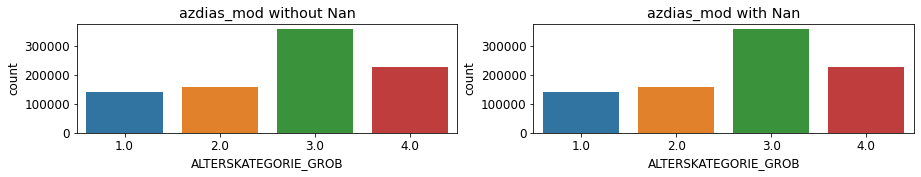

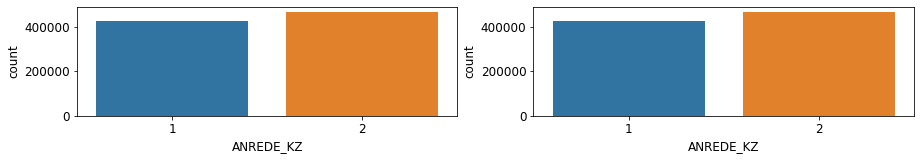

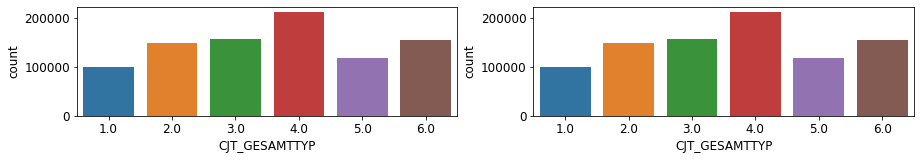

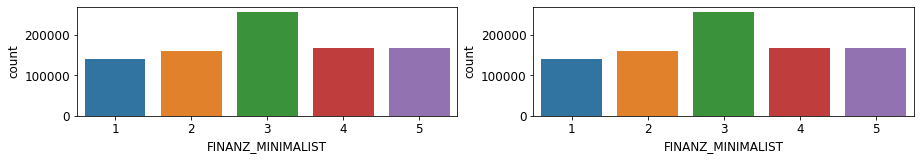

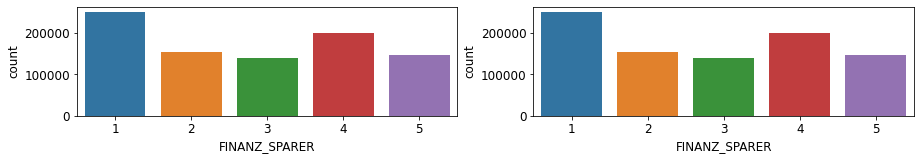

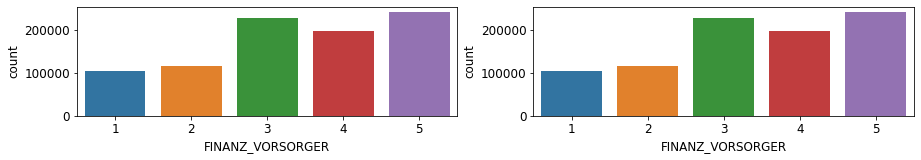

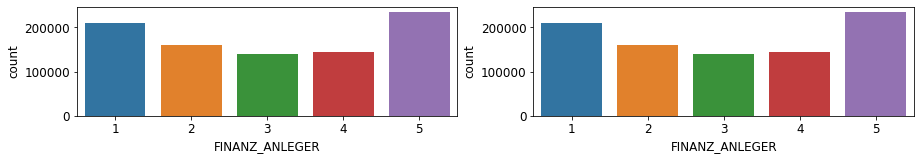

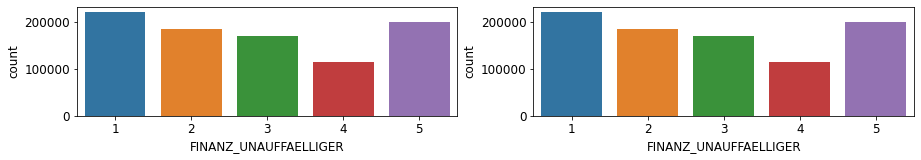

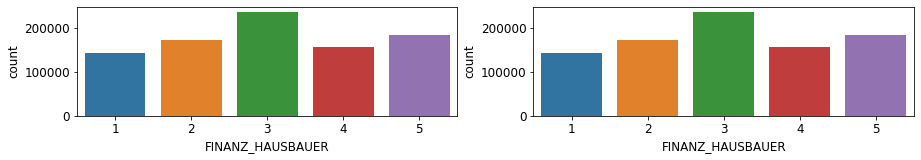

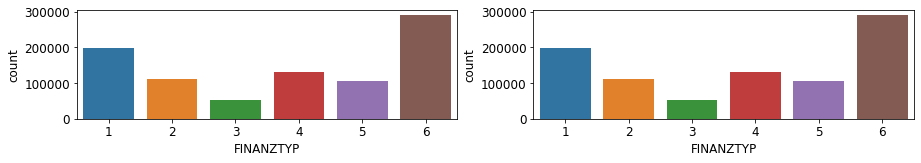

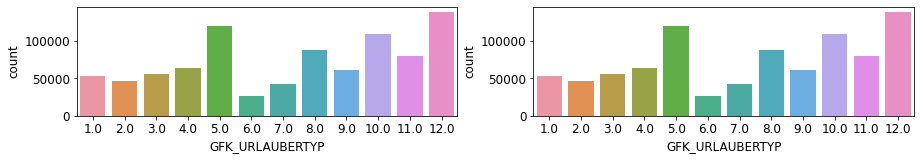

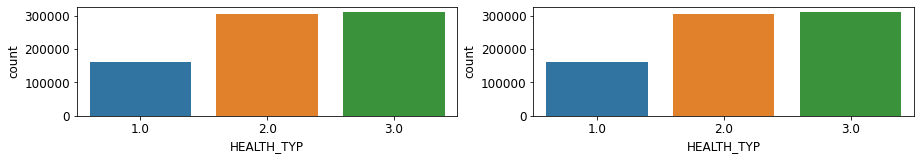

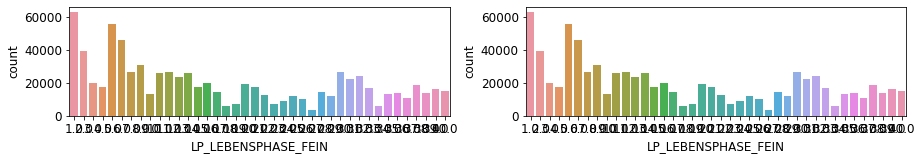

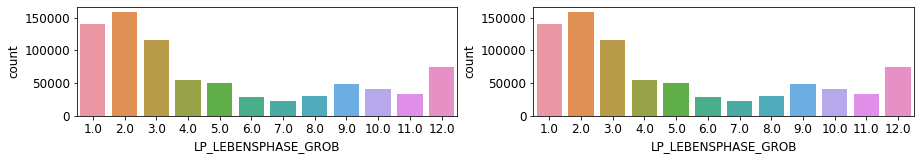

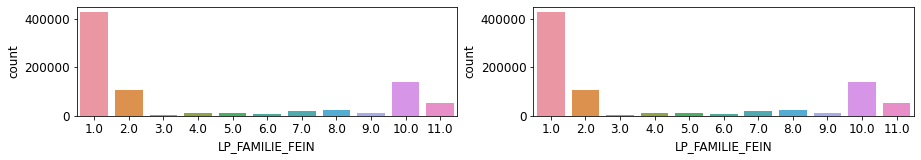

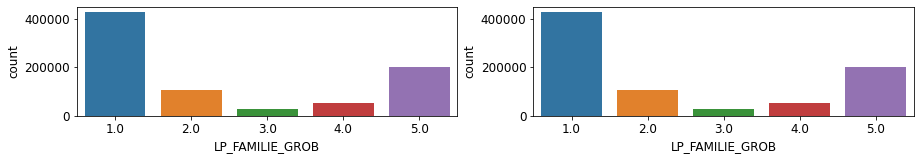

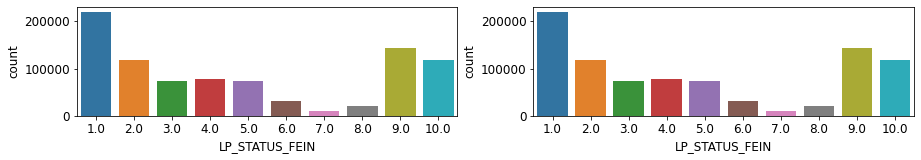

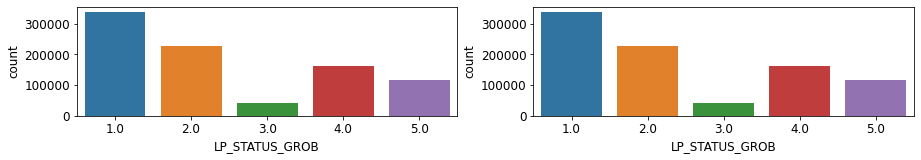

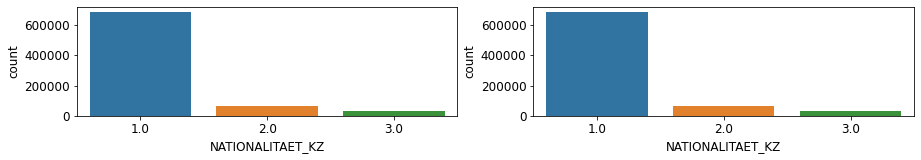

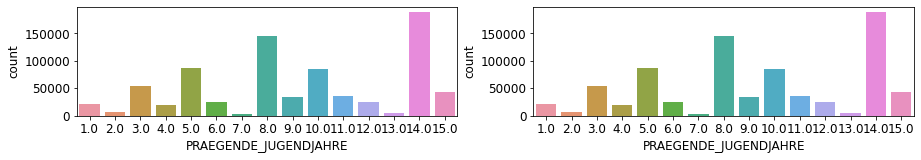

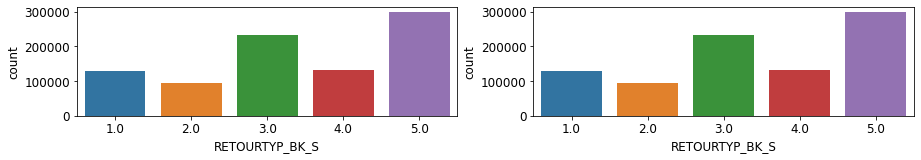

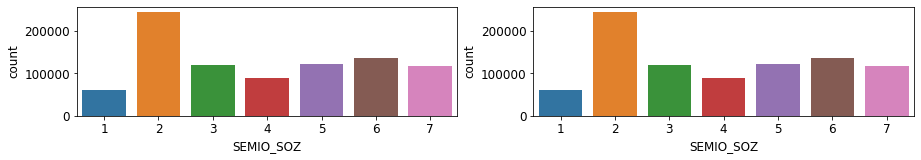

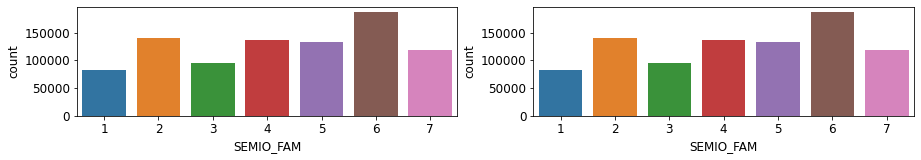

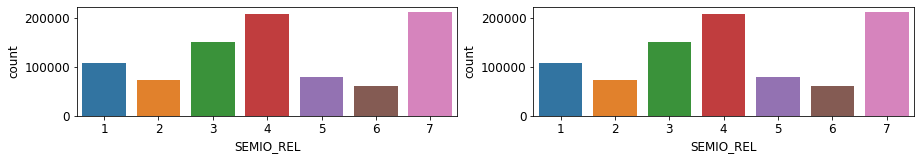

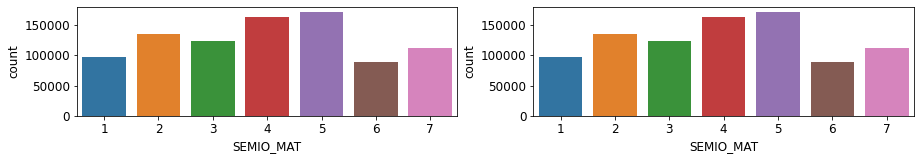

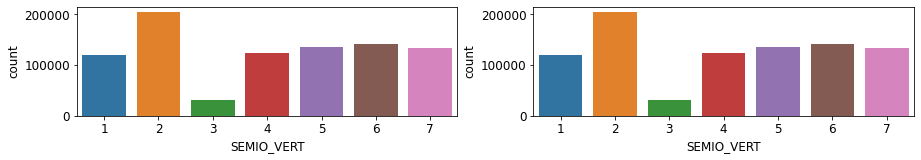

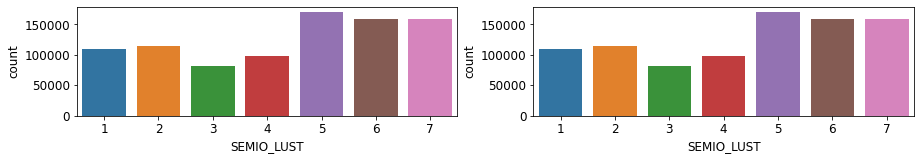

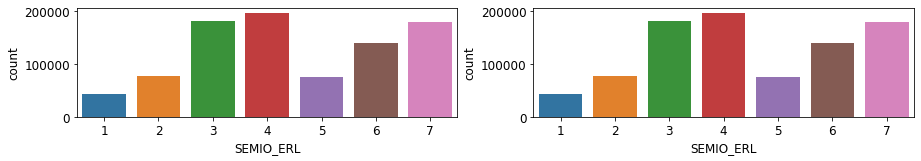

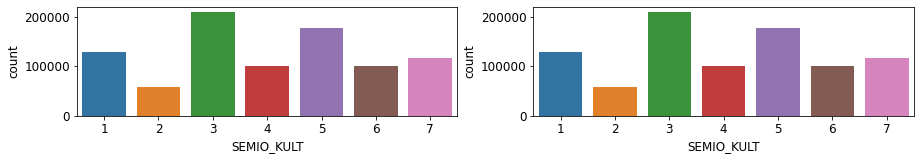

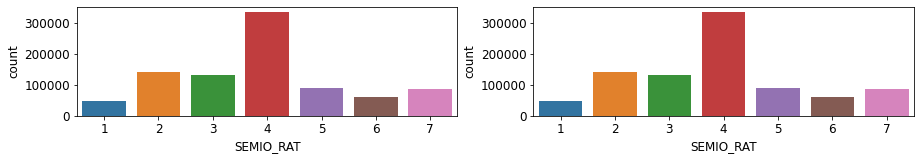

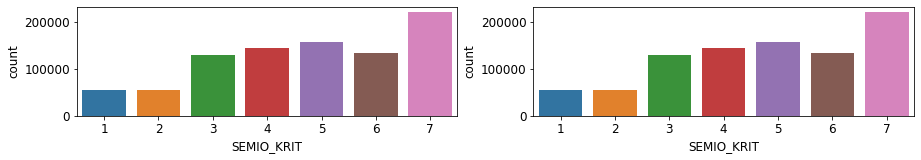

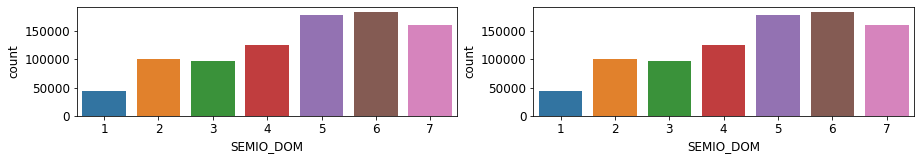

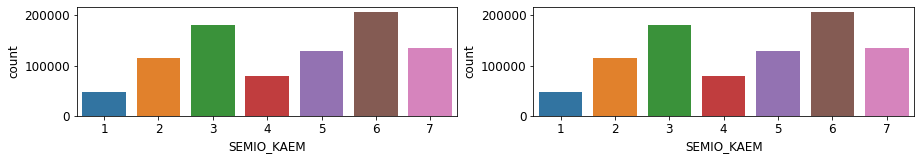

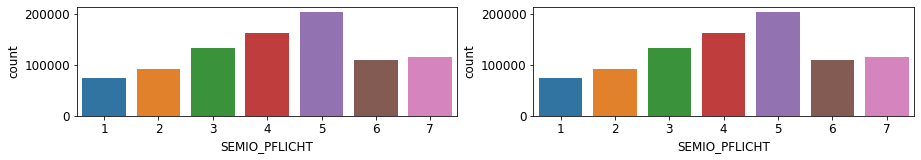

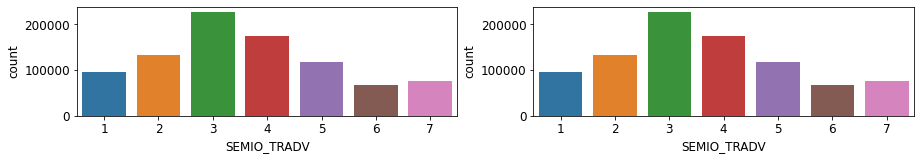

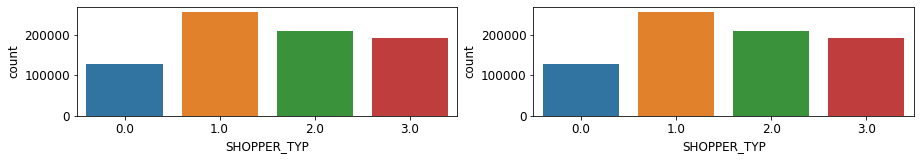

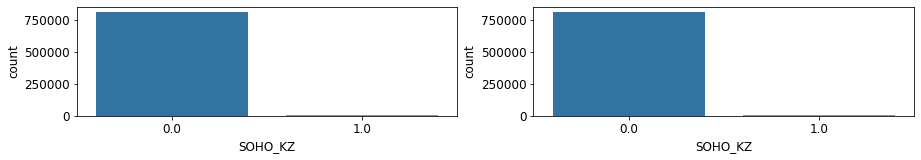

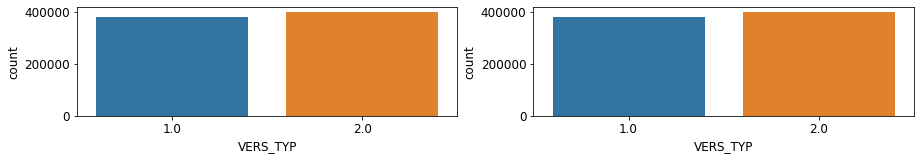

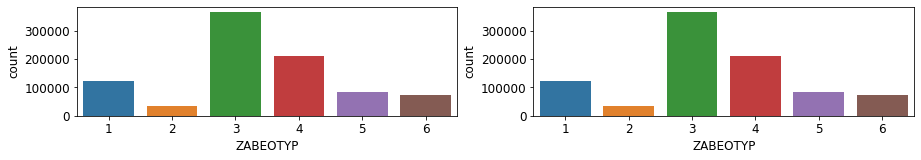

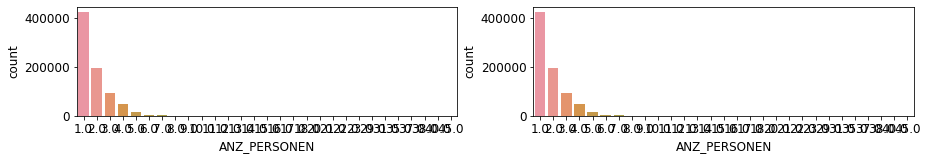

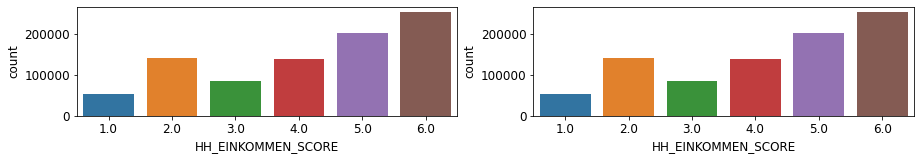

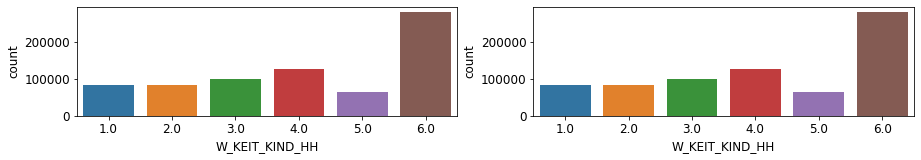

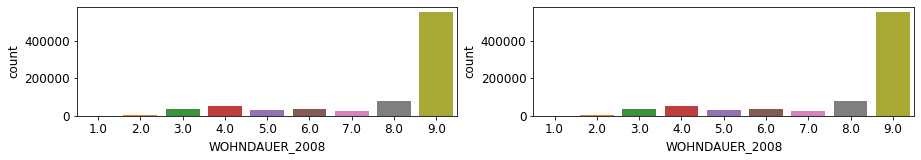

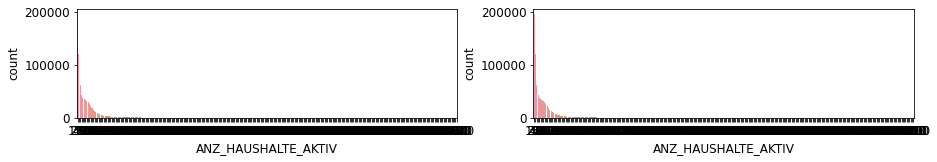

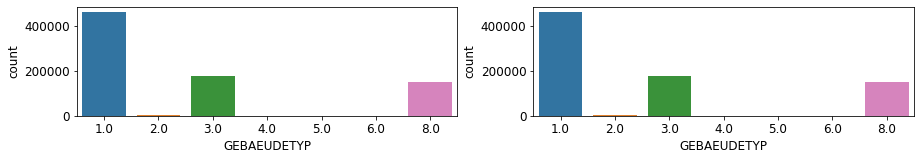

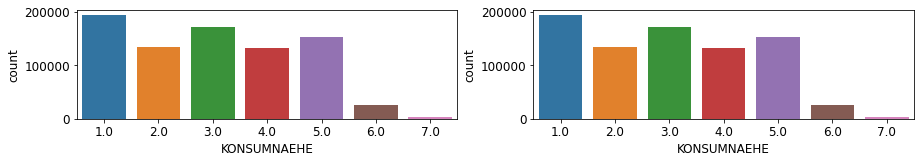

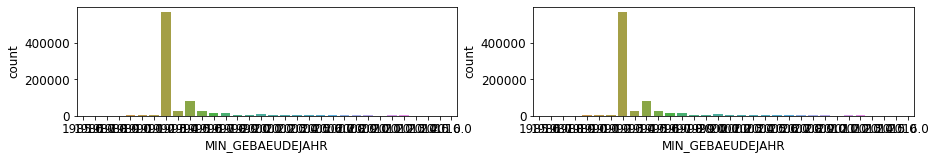

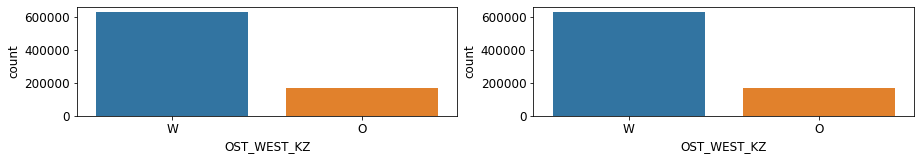

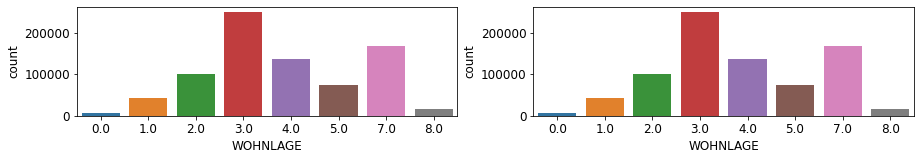

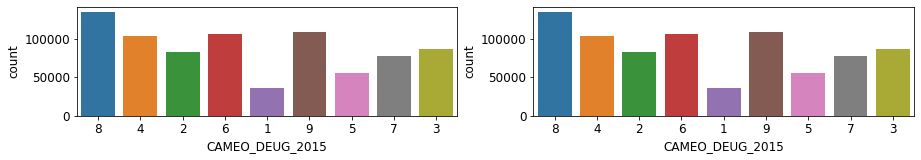

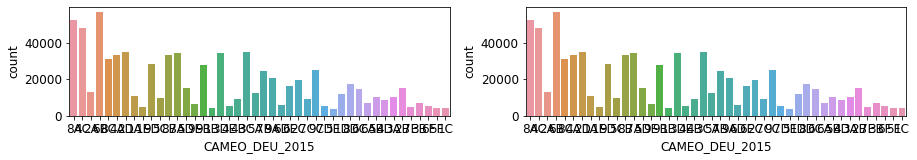

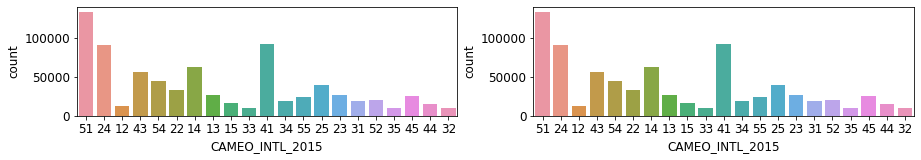

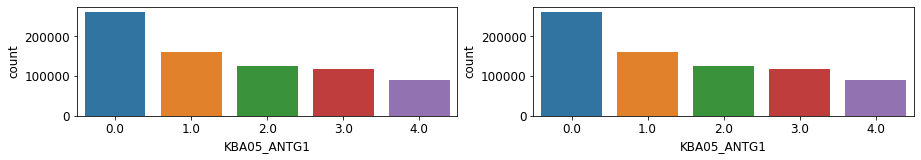

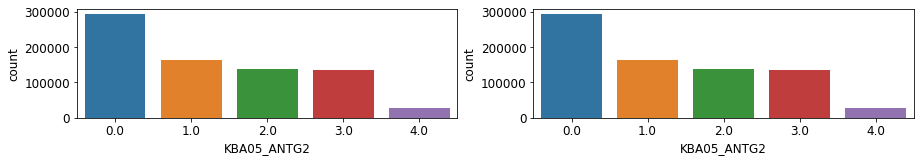

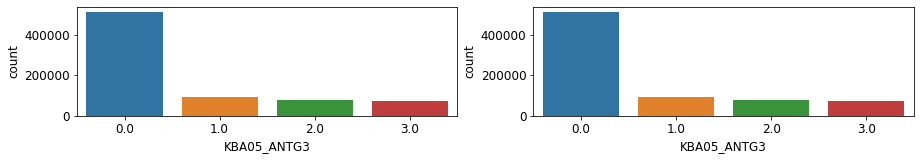

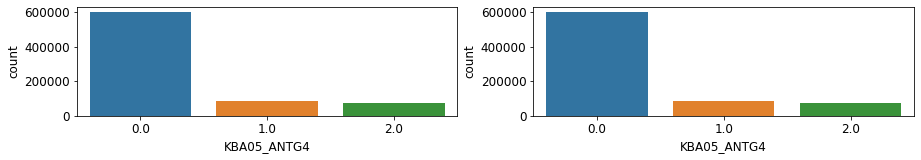

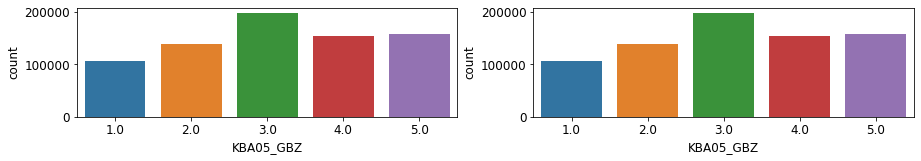

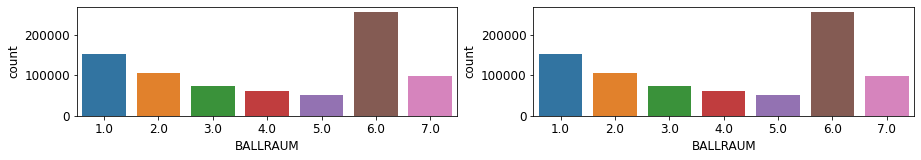

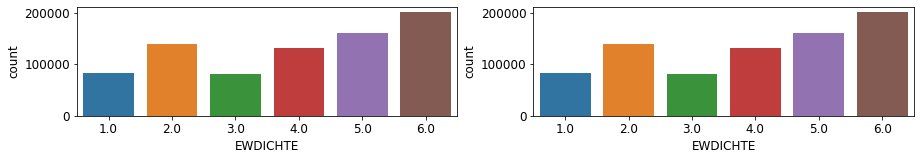

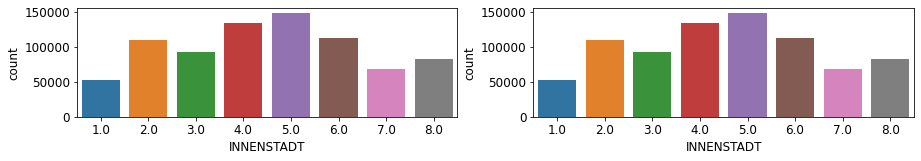

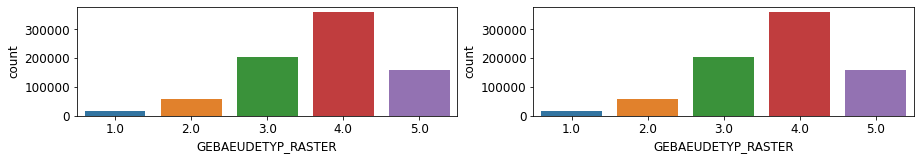

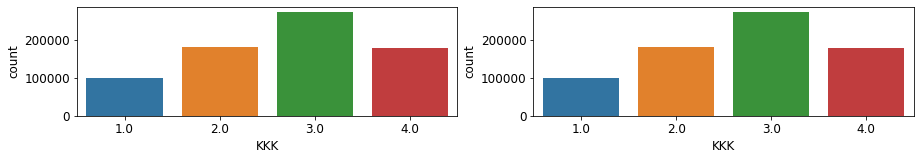

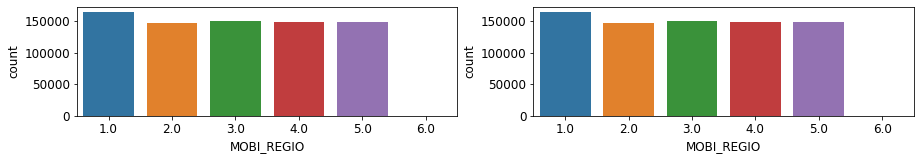

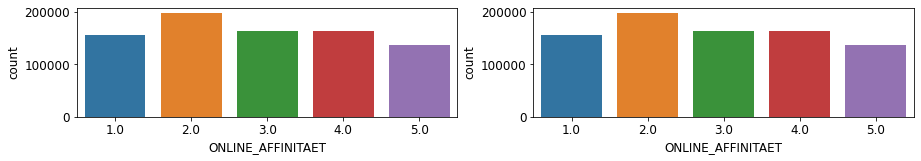

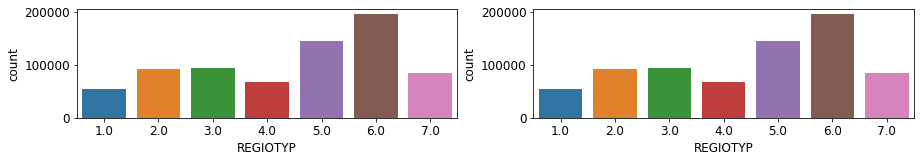

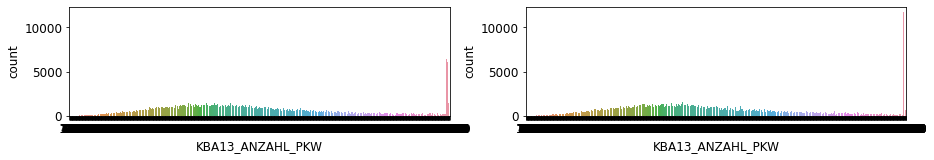

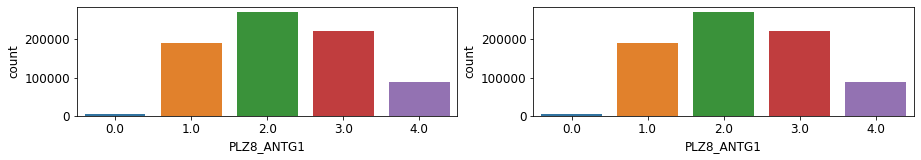

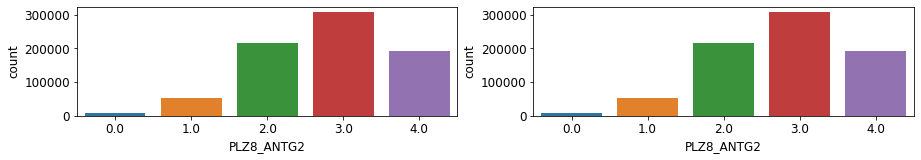

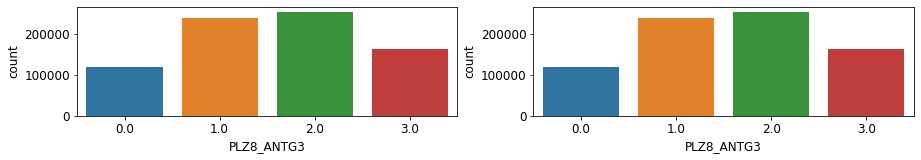

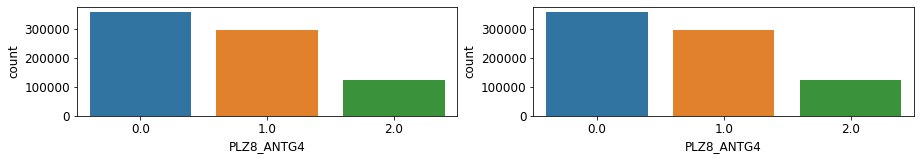

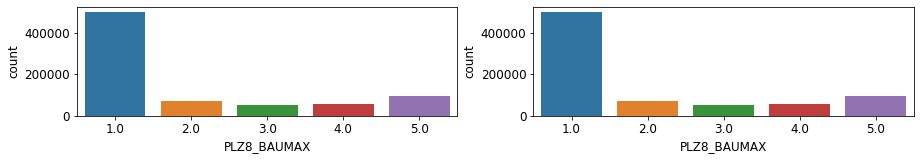

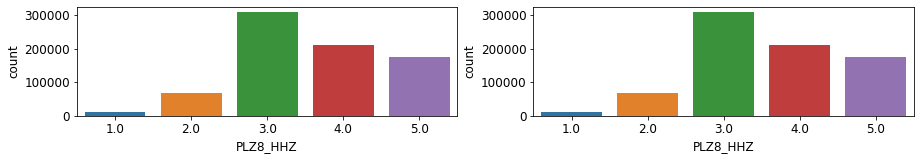

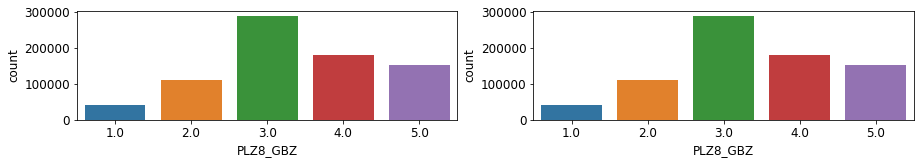

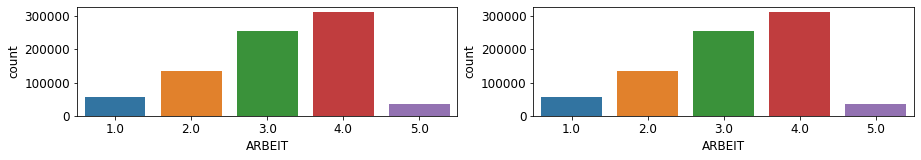

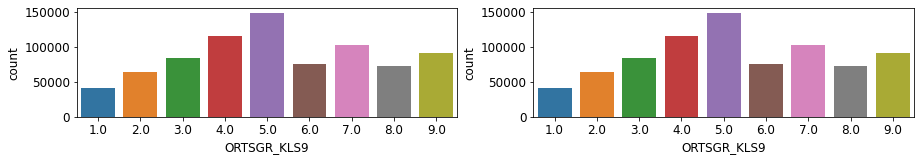

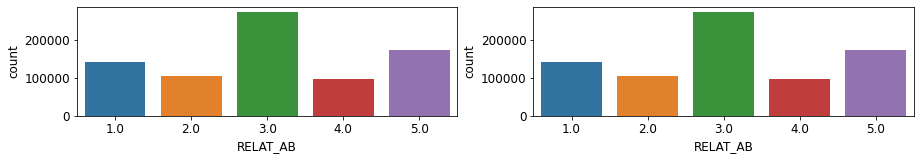

In [30]:
plt.rcParams["figure.figsize"] = (15,2)
plt.rcParams["font.size"]      = 12
    
col_names = azdias_mod.columns

for i, col_name in enumerate(col_names):
    fig = plt.figure()
    #
    ax1 = fig.add_subplot(1, 2, 1)
    sns.countplot(x=azdias_mod[col_name])
    if i==0:
        ax1.set_title("azdias_mod without Nan")
    #
    ax2 = fig.add_subplot(1, 2, 2)
    sns.countplot(x=azdias_mod[col_name])
    if i==0:
        ax2.set_title("azdias_mod with Nan")    

<a id="mokuji_2_4"></a>
### [2-4. Discussions about Data Types](#mokuji_0)

Before proceeding to the encoding step, I show data types in the dataset.<br>
I show unique values for each type in the cell below.<br>
From the results of below cell, I can see 5 data types.
 1. `numeric`  ---> The size of value has meanings. So, I can use this without modification.
 2. `ordinal`  ---> The size of value has meanings. So, I can use this without modification.
 3. `interval` ---> The size of value has meanings. So, I can use this without modification.
 4. `categorical`  ---> The size of value has **no meanings**. So I need to modify this.
    - For `categorical` data, I will apply one-hot encoding.
 5. `mixed`  ---> The size of value has **no meanings**. So I need to modify this.
    - For `mixed` data, I will explain how to treat them later.

In [31]:
def display_unique_variables(df, data_type):
    feature_names_all = feat_info[feat_info.type == data_type]["attribute"].values
    feat_names_in_df  = df.columns
    #
    print("=====================")
    print("Type = ", data_type)
    print("=====================")
    #
    for tmp_name in feature_names_all:
        if (tmp_name in feat_names_in_df):
            unique_values = df[tmp_name].unique()
            print("column = ", tmp_name)
            print("       ", unique_values)
    #
    print("\n")

In [32]:
for data_type in ["numeric", "ordinal", "interval", "categorical", "mixed"]:
    display_unique_variables(azdias_wo_nan, data_type)

Type =  numeric
column =  ANZ_PERSONEN
        [ 2.  1.  4.  3.  5.  6.  8.  7. 12.  9. 21. 10. 13. 11. 14. 20. 31. 37.
 16. 22. 15. 18. 35. 38.]
column =  ANZ_HAUSHALTE_AKTIV
        [ 11.  10.   3.   5.   4.   6.   2.   9.   1.  14.   8.  44.  25. 272.
  13.  33.  12.  15.  22.  21.   7.  20.  23.  18.  24.  31.  39.  16.
  19.  30.  29.  17.  88.  49.  60.  35.  45.  28.  26.  77.  27.  47.
  50.  36.  43.  54.  41.  40.  37.  53.  57.  38. 118.  32.  78.  42.
  70.  46.  73. 137.  59.  80.  92. 126.  71.  68.  81.  52.  69.  66.
  76.  34.  95.  48.  63. 124.  90. 128.  67.  56.  83. 102.  58. 259.
  51. 160. 134. 169. 246.  82. 114. 183.  86.  61. 143.  64.  99. 216.
 125. 112. 123.  55. 141.  62.  72.  85.  87. 223.  93. 179.  98. 135.
 149.  97. 101.  75. 109. 121. 236. 103. 367. 195.  89.  94. 107. 119.
 161. 157. 175.  91. 136.  65. 116. 120.  84.  79. 104. 177. 316. 127.
 155. 133. 178. 176. 110. 131. 122. 258. 111. 256. 117. 211. 199. 140.
 200. 108. 106. 285. 180. 163. 377.

Careful observation of `mixed` revealed the following:
- **PRAEGENDE_JUGENDJAHRE** combines information on two dimensions:
  1. generation by decade
    - e.g. = 40s, 50s, 60s, 70s, 80s, 90s
  2. movement
    - e.g. = Mainstream, Avantgarde
    
- I will create two new variables to capture the other two dimensions.
  1. **PRAEGENDE_JUGENDJAHRE_GEN** = continuous numerical data
  2. **PRAEGENDE_JUGENDJAHRE_MOV** = binary numerical data
  
---
- **CAMEO_INTL_2015** combines information on two dimensions:
  1. wealth : first digit shows wealth level
  2. lifestage : second digit shows lifestage level
    
- I will create two new variables to capture the other two dimensions.
  1. **CAMEO_INTL_2015_WEALTH** = continuous numerical data from 1 to 5
  2. **CAMEO_INTL_2015_LIFESTAGE** = continuous numerical data from 1 to 5
  
---
- Other features in `mixed`
  - I will drop these features because I know these features are unnecessary from this dataset comments.

<a id="mokuji_2_5"></a>
### [2-5. Encoding](#mokuji_0)

In the cell above, I investigated data distribution of `azdias` and applied three function to `azdias`.
  1. `conv_miss_to_nan(feat_info, azdias)` : This converts `missing_or_unknown` to `nan`.
  2. `remove_cols_with_nan(azdias, thresh_percentage=20.0)` : This removes columns which have nans over threshold.
  3. `remove_rows_with_nan(azdias, thresh_percentage=0.1)` : This removes rows which have nans over threshold.

In this section, I will apply some encoding processes to data with the policy which was explained in the cells above.

#### Encoding policy for `categorical`
- Policy-1. two level numerical data => 0 or 1
- Policy-2. two level character data => 0 or 1
- Policy-3. multi level numerical data => one-hot-encoding
- Policy-4. multi level character data => one-hot-encoding


- I will create two functions.
  - Func-1. `get_categorical_featrues_to_encode`
  - Func-2. `edencode_categorical(azdias)`


- To reduce data size, I will transform the data type of `categorical` to `uint8`.
 
    
#### Encoding policy for `mixed`
- I explained in the previous cell.
- I will create a function `encode_mix(azdias)`.

<a id="mokuji_2_5_1"></a>
### [2-5-1. Encoding : `categorical`](#mokuji_0)

### Get feature names of `azdias_wo_nan` whose type are `categorical`

In [33]:
categorical_features_all = list(feat_info[feat_info["type"]=="categorical"].attribute)
categorical_features_now = set(list(azdias_wo_nan.columns)) & set(categorical_features_all)
display("categorical_features_now = ", categorical_features_now)

'categorical_features_now = '

{'ANREDE_KZ',
 'CAMEO_DEUG_2015',
 'CAMEO_DEU_2015',
 'CJT_GESAMTTYP',
 'FINANZTYP',
 'GEBAEUDETYP',
 'GFK_URLAUBERTYP',
 'LP_FAMILIE_FEIN',
 'LP_FAMILIE_GROB',
 'LP_STATUS_FEIN',
 'LP_STATUS_GROB',
 'NATIONALITAET_KZ',
 'OST_WEST_KZ',
 'SHOPPER_TYP',
 'SOHO_KZ',
 'VERS_TYP',
 'ZABEOTYP'}

In [34]:
def get_categorical_featrues_to_encode(feat_info, df, categorical_col_names, flag_print=False):
    two_level_num = []
    two_level_str = []
    mul_level_num = []
    mul_level_str = []
    str_apo  = "\'"
    type_str = "<class " + str_apo + "str" + str_apo + ">"
    #
    all_col_names    = list(df.columns)
    target_col_names = set(categorical_col_names) & set(all_col_names)    
    #
    for col_name in target_col_names:
        if flag_print:
            print("-----------------------------------------")
            print("< ", col_name, " >")
        #
        try:
            unique_value = df[col_name].dropna().unique()
            current_type = str(type(unique_value[0]))
            #
            if flag_print:
                print("    current_type = ", current_type)
                print("    unique_value = ", unique_value )
            #
            if len(unique_value) == 2:
                if current_type == type_str:
                    two_level_str.append(col_name)
                    if flag_print:
                        print("    two_level_str")
                else:
                    two_level_num.append(col_name)
                    if flag_print:
                        print("    two_level_num")
                #
            else:
                if current_type == type_str:
                    mul_level_str.append(col_name)
                    if flag_print:
                        print("    mul_level_str")
                        
                else:
                    mul_level_num.append(col_name)
                    if flag_print:
                        print("    mul_level_num")
                    
        except:
            if flag_print:
                print("    ---> There is no data. This is already dropped.")
    #
    return two_level_num, two_level_str, mul_level_num, mul_level_str
    

In [35]:
def get_features_multi_category(feat_info, df):
    features_categorical    = feat_info[feat_info["type"] == "categorical"].attribute
    features_multi_category = []
    #
    for feature in features_categorical:
        if feature in df.columns:
            if df[feature].nunique() > 2:
                features_multi_category.append(feature)
    #
    return features_multi_category

In [36]:
def encode_categorical_two_num(df, col_names):
    if len(col_names) > 0:
        for col_name in col_names:
            unique_values = df[col_name].unique()
            df[col_name].replace(unique_values[0], 200, inplace=True)
            df[col_name].replace(unique_values[1], 201, inplace=True)
            #
            df[col_name].replace(200, 0, inplace=True)
            df[col_name].replace(201, 1, inplace=True)
    #
    return df

In [37]:
def encode_categorical_two_str(df, col_names):
    if len(col_names) > 0:
        for col_name in col_names:
            unique_values = df[col_name].unique()
            df[col_name].replace(unique_values[0], 0, inplace=True)
            df[col_name].replace(unique_values[1], 1, inplace=True)
    #
    return df

In [38]:
def encode_categorical_mul_level(df, col_names):
    if len(col_names) > 0:
        df = pd.get_dummies(df, columns=col_names)
    #
    return df

In [39]:
def encode_categorical(feat_info, df, categorical_col_names, flag_print=False):
    # get feature names to encode
    two_level_num, two_level_str, mul_level_num, mul_level_str = \
        get_categorical_featrues_to_encode(feat_info, df, categorical_col_names, False)
    
    if flag_print:
        print("--------------------------------")
        print("two_level_num = ", two_level_num)
        print("two_level_str = ", two_level_str)
        print("mul_level_num = ", mul_level_num)
        print("mul_level_str = ", mul_level_str)
        print("--------------------------------")    
    
    #- Policy-1. two level numerical data => 0 or 1
    df = encode_categorical_two_num(df, two_level_num)
    print("    encode_categorical_two_num: shape = ", df.shape)

    #- Policy-2. two level character data => 0 or 1
    df = encode_categorical_two_str(df, two_level_str)
    print("    encode_categorical_two_str: shape = ", df.shape)

    #- Policy-3. multi level numerical data => one-hot-encoding
    df = encode_categorical_mul_level(df, mul_level_num)
    print("    encode_categorical_mul_level: shape = ", df.shape)
    
    #- Policy-4. multi level character data => one-hot-encoding
    df = encode_categorical_mul_level(df, mul_level_str)
    print("    encode_categorical_mul_level: shape = ", df.shape)

    return df

In [40]:
display(azdias_wo_nan.shape)

(573234, 76)

In [41]:
azdias_wo_nan = encode_categorical(feat_info, azdias_wo_nan, categorical_features_now);

D:\app\anaconda3\envs\UdaCity_3_7_13\lib\site-packages\pandas\core\generic.py:6619: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


    encode_categorical_two_num: shape =  (573234, 76)
    encode_categorical_two_str: shape =  (573234, 76)
    encode_categorical_mul_level: shape =  (573234, 136)
    encode_categorical_mul_level: shape =  (573234, 187)


In [42]:
display(azdias_wo_nan.shape)
display(azdias_wo_nan.head(10))
display(azdias_wo_nan.info())

(573234, 187)

,ALTERSKATEGORIE_GROB,ANREDE_KZ,FINANZ_MINIMALIST,FINANZ_SPARER,FINANZ_VORSORGER,FINANZ_ANLEGER,FINANZ_UNAUFFAELLIGER,FINANZ_HAUSBAUER,HEALTH_TYP,LP_LEBENSPHASE_FEIN,LP_LEBENSPHASE_GROB,PRAEGENDE_JUGENDJAHRE,RETOURTYP_BK_S,SEMIO_SOZ,SEMIO_FAM,SEMIO_REL,SEMIO_MAT,SEMIO_VERT,SEMIO_LUST,SEMIO_ERL,SEMIO_KULT,SEMIO_RAT,SEMIO_KRIT,SEMIO_DOM,SEMIO_KAEM,SEMIO_PFLICHT,SEMIO_TRADV,SOHO_KZ,VERS_TYP,ANZ_PERSONEN,HH_EINKOMMEN_SCORE,W_KEIT_KIND_HH,WOHNDAUER_2008,ANZ_HAUSHALTE_AKTIV,KONSUMNAEHE,MIN_GEBAEUDEJAHR,OST_WEST_KZ,WOHNLAGE,CAMEO_INTL_2015,KBA05_ANTG1,KBA05_ANTG2,KBA05_ANTG3,KBA05_ANTG4,KBA05_GBZ,BALLRAUM,EWDICHTE,INNENSTADT,GEBAEUDETYP_RASTER,KKK,MOBI_REGIO,ONLINE_AFFINITAET,REGIOTYP,KBA13_ANZAHL_PKW,PLZ8_ANTG1,PLZ8_ANTG2,PLZ8_ANTG3,PLZ8_ANTG4,PLZ8_BAUMAX,PLZ8_HHZ,PLZ8_GBZ,ARBEIT,ORTSGR_KLS9,RELAT_AB,CJT_GESAMTTYP_1.0,CJT_GESAMTTYP_2.0,CJT_GESAMTTYP_3.0,CJT_GESAMTTYP_4.0,CJT_GESAMTTYP_5.0,CJT_GESAMTTYP_6.0,LP_FAMILIE_FEIN_1.0,LP_FAMILIE_FEIN_2.0,LP_FAMILIE_FEIN_3.0,LP_FAMILIE_FEIN_4.0,LP_FAMILIE_FEIN_5.0,LP_FAMILIE_FEIN_6.0,LP_FAMILIE_FEIN_7.0,LP_FAMILIE_FEIN_8.0,LP_FAMILIE_FEIN_9.0,LP_FAMILIE_FEIN_10.0,LP_FAMILIE_FEIN_11.0,ZABEOTYP_1,ZABEOTYP_2,ZABEOTYP_3,ZABEOTYP_4,ZABEOTYP_5,ZABEOTYP_6,NATIONALITAET_KZ_1.0,NATIONALITAET_KZ_2.0,NATIONALITAET_KZ_3.0,GFK_URLAUBERTYP_1.0,GFK_URLAUBERTYP_2.0,GFK_URLAUBERTYP_3.0,GFK_URLAUBERTYP_4.0,GFK_URLAUBERTYP_5.0,GFK_URLAUBERTYP_6.0,GFK_URLAUBERTYP_7.0,GFK_URLAUBERTYP_8.0,GFK_URLAUBERTYP_9.0,GFK_URLAUBERTYP_10.0,GFK_URLAUBERTYP_11.0,GFK_URLAUBERTYP_12.0,LP_STATUS_FEIN_1.0,LP_STATUS_FEIN_2.0,LP_STATUS_FEIN_3.0,LP_STATUS_FEIN_4.0,LP_STATUS_FEIN_5.0,LP_STATUS_FEIN_6.0,LP_STATUS_FEIN_7.0,LP_STATUS_FEIN_8.0,LP_STATUS_FEIN_9.0,LP_STATUS_FEIN_10.0,LP_FAMILIE_GROB_1.0,LP_FAMILIE_GROB_2.0,LP_FAMILIE_GROB_3.0,LP_FAMILIE_GROB_4.0,LP_FAMILIE_GROB_5.0,GEBAEUDETYP_1.0,GEBAEUDETYP_3.0,GEBAEUDETYP_8.0,LP_STATUS_GROB_1.0,LP_STATUS_GROB_2.0,LP_STATUS_GROB_3.0,LP_STATUS_GROB_4.0,LP_STATUS_GROB_5.0,SHOPPER_TYP_0.0,SHOPPER_TYP_1.0,SHOPPER_TYP_2.0,SHOPPER_TYP_3.0,FINANZTYP_1,FINANZTYP_2,FINANZTYP_3,FINANZTYP_4,FINANZTYP_5,FINANZTYP_6,CAMEO_DEUG_2015_1,CAMEO_DEUG_2015_2,CAMEO_DEUG_2015_3,CAMEO_DEUG_2015_4,CAMEO_DEUG_2015_5,CAMEO_DEUG_2015_6,CAMEO_DEUG_2015_7,CAMEO_DEUG_2015_8,CAMEO_DEUG_2015_9,CAMEO_DEU_2015_1A,CAMEO_DEU_2015_1B,CAMEO_DEU_2015_1C,CAMEO_DEU_2015_1D,CAMEO_DEU_2015_1E,CAMEO_DEU_2015_2A,CAMEO_DEU_2015_2B,CAMEO_DEU_2015_2C,CAMEO_DEU_2015_2D,CAMEO_DEU_2015_3A,CAMEO_DEU_2015_3B,CAMEO_DEU_2015_3C,CAMEO_DEU_2015_3D,CAMEO_DEU_2015_4A,CAMEO_DEU_2015_4B,CAMEO_DEU_2015_4C,CAMEO_DEU_2015_4D,CAMEO_DEU_2015_4E,CAMEO_DEU_2015_5A,CAMEO_DEU_2015_5B,CAMEO_DEU_2015_5C,CAMEO_DEU_2015_5D,CAMEO_DEU_2015_5E,CAMEO_DEU_2015_5F,CAMEO_DEU_2015_6A,CAMEO_DEU_2015_6B,CAMEO_DEU_2015_6C,CAMEO_DEU_2015_6D,CAMEO_DEU_2015_6E,CAMEO_DEU_2015_6F,CAMEO_DEU_2015_7A,CAMEO_DEU_2015_7B,CAMEO_DEU_2015_7C,CAMEO_DEU_2015_7D,CAMEO_DEU_2015_7E,CAMEO_DEU_2015_8A,CAMEO_DEU_2015_8B,CAMEO_DEU_2015_8C,CAMEO_DEU_2015_8D,CAMEO_DEU_2015_9A,CAMEO_DEU_2015_9B,CAMEO_DEU_2015_9C,CAMEO_DEU_2015_9D,CAMEO_DEU_2015_9E
1,1.0,0,1,5,2,5,4,5,3.0,21.0,6.0,14.0,1.0,5,4,4,3,1,2,2,3,6,4,7,4,7,6,0.0,0.0,2.0,6.0,3.0,9.0,11.0,1.0,1992.0,0,4.0,51,0.0,0.0,0.0,2.0,1.0,6.0,3.0,8.0,3.0,2.0,1.0,3.0,3.0,963.0,2.0,3.0,2.0,1.0,1.0,5.0,4.0,3.0,5.0,4.0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
2,3.0,0,1,4,1,2,3,5,3.0,3.0,1.0,15.0,3.0,4,1,3,3,4,4,6,3,4,7,7,7,3,3,1.0,1.0,1.0,4.0,3.0,9.0,10.0,5.0,1992.0,0,2.0,24,1.0,3.0,1.0,0.0,3.0,2.0,4.0,4.0,4.0,2.0,3.0,2.0,2.0,712.0,3.0,3.0,1.0,0.0,1.0,4.0,4.0,3.0,5.0,2.0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,3.0,1,4,3,4,1,3,2,3.0,32.0,10.0,8.0,5

<class 'pandas.core.frame.DataFrame'>
Int64Index: 573234 entries, 1 to 891219
Columns: 187 entries, ALTERSKATEGORIE_GROB to CAMEO_DEU_2015_9E
dtypes: float64(40), int64(22), object(1), uint8(124)
memory usage: 347.7+ MB


None

<a id="mokuji_2_5_2"></a>
### [2-5-2. Encoding : `mixed`](#mokuji_0)

### The encoding function : PRAEGENDE_JUGENDJAHRE

In [43]:
# PRAEGENDE_JUGENDJAHRE-1
def encode_generations(input_value):
    encode_map    = {}
    encode_map[0] = [1,2]   # 40s
    encode_map[1] = [3,4]   # 50s
    encode_map[2] = [5,6,7] # 60s
    encode_map[3] = [8,9]   # 70s
    encode_map[4] = [10,11,12,13] # 80s
    encode_map[5] = [14,15] # 90s
    #
    try:
        for new_value, old_values in encode_map.items():
            if input_value in old_values:
                return new_value
    # When input value is Nan
    except ValueError:
        return np.nan
#-----------------------------------------------#
# PRAEGENDE_JUGENDJAHRE-2
def encode_movement(input_value):
    value_of_mainstrem = [1, 3, 5, 8, 10, 12, 14]
    #
    try:
        if input_value in value_of_mainstrem:
            return 1
        else:
            return 0
    # When input value is Nan
    except ValueError:
        return np.nan
    

### The encoding function : CAMEO_INTL_2015

In [44]:
#-----------------------------------------------#
# CAMEO_INTL_2015-1
def encode_wealth(input_value):
    if pd.isnull(input_value):
        return np.nan
    else:
        # First digit
        return int(str(input_value)[0])
    
#-----------------------------------------------#
# CAMEO_INTL_2015-2
def encode_lifestage(input_value):
    if pd.isnull(input_value):
        return np.nan
    else:
        # Second digit
        return int(str(input_value)[1])    

### Drop Features : Mixed Others

In [45]:
from Library.my_common_tool import list_intersection
#-----------------------------------------------#
# Mixed Others
def get_col_names_to_drop_for_mixed_others(df, feat_info):
    features_now       = list(df.columns)
    features_mixed_all = list(feat_info[feat_info["type"] == "mixed"].attribute)
    features_special   = ["PRAEGENDE_JUGENDJAHRE", "CAMEO_INTL_2015"]
    features_mixed_other = set(features_mixed_all) ^ set(features_special)
    features_mixed_other = set(features_mixed_other) & set(features_now)
    print("Drop Features of Mixed = ", features_mixed_other)
    df = df.drop(features_mixed_other, axis=1)
    return list(features_mixed_other)

### The encoding function : For Mixed All

In [46]:
def encode_mixed(df, feat_info):
    # Mixed-1 : "PRAEGENDE_JUGENDJAHRE" 
    if "PRAEGENDE_JUGENDJAHRE" in df.columns:
        df["PRAEGENDE_JUGENDJAHRE_GEN"] = df["PRAEGENDE_JUGENDJAHRE"].apply(encode_generations)
        df["PRAEGENDE_JUGENDJAHRE_MOV"] = df["PRAEGENDE_JUGENDJAHRE"].apply(encode_movement)
        df = df.drop(["PRAEGENDE_JUGENDJAHRE"], axis=1)
    
    print("    Mixed-1 : PRAEGENDE_JUGENDJAHRE: shape = ", df.shape)
    
    # Mixed-2 : "CAMEO_INTL_2015"
    if "CAMEO_INTL_2015" in df.columns:
        df["CAMEO_INTL_2015_WEAL"] = df["CAMEO_INTL_2015"].apply(encode_wealth)
        df["CAMEO_INTL_2015_LIFE"] = df["CAMEO_INTL_2015"].apply(encode_lifestage)
        df = df.drop(["CAMEO_INTL_2015"], axis=1)    
    
    print("    Mixed-2 : CAMEO_INTL_2015: shape = ", df.shape)

    return df
#-----------------------------------------------#

In [47]:
azdias_wo_nan.shape

(573234, 187)

In [48]:
azdias_wo_nan = encode_mixed(azdias_wo_nan, feat_info)
azdias_wo_nan[["PRAEGENDE_JUGENDJAHRE_GEN", "PRAEGENDE_JUGENDJAHRE_MOV", "CAMEO_INTL_2015_WEAL", "CAMEO_INTL_2015_LIFE"] ]

    Mixed-1 : PRAEGENDE_JUGENDJAHRE: shape =  (573234, 188)
    Mixed-2 : CAMEO_INTL_2015: shape =  (573234, 189)


,PRAEGENDE_JUGENDJAHRE_GEN,PRAEGENDE_JUGENDJAHRE_MOV,CAMEO_INTL_2015_WEAL,CAMEO_INTL_2015_LIFE
1,5,1,5,1
2,5,0,2,4
4,3,1,4,3
5,1,1,5,4
6,4,1,2,2
...,...,...,...,...
891210,3,1,4,1
891213,4,0,3,4
891214,5,1,2,3
891215,4,1,3,1


In [49]:
azdias_wo_nan.shape

(573234, 189)

In [50]:
azdias_wo_nan.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 573234 entries, 1 to 891219
Columns: 189 entries, ALTERSKATEGORIE_GROB to CAMEO_INTL_2015_LIFE
dtypes: float64(39), int64(26), uint8(124)
memory usage: 356.4 MB


<a id="mokuji_2_6"></a>
### [2-6. Scaling](#mokuji_0)

Before I apply dimensionality reduction techniques to the data, I need to perform feature scaling so that the principal component vectors are not influenced by the natural differences in scale for features. 

In [51]:
from sklearn.preprocessing import StandardScaler
std_scaler = StandardScaler()
scaler_out = std_scaler.fit_transform(azdias_wo_nan)
azdias_scaled = pd.DataFrame(scaler_out)
azdias_scaled.columns = azdias_wo_nan.columns
azdias_scaled.describe()

,ALTERSKATEGORIE_GROB,ANREDE_KZ,FINANZ_MINIMALIST,FINANZ_SPARER,FINANZ_VORSORGER,FINANZ_ANLEGER,FINANZ_UNAUFFAELLIGER,FINANZ_HAUSBAUER,HEALTH_TYP,LP_LEBENSPHASE_FEIN,LP_LEBENSPHASE_GROB,RETOURTYP_BK_S,SEMIO_SOZ,SEMIO_FAM,SEMIO_REL,SEMIO_MAT,SEMIO_VERT,SEMIO_LUST,SEMIO_ERL,SEMIO_KULT,SEMIO_RAT,SEMIO_KRIT,SEMIO_DOM,SEMIO_KAEM,SEMIO_PFLICHT,SEMIO_TRADV,SOHO_KZ,VERS_TYP,ANZ_PERSONEN,HH_EINKOMMEN_SCORE,W_KEIT_KIND_HH,WOHNDAUER_2008,ANZ_HAUSHALTE_AKTIV,KONSUMNAEHE,MIN_GEBAEUDEJAHR,OST_WEST_KZ,WOHNLAGE,KBA05_ANTG1,KBA05_ANTG2,KBA05_ANTG3,KBA05_ANTG4,KBA05_GBZ,BALLRAUM,EWDICHTE,INNENSTADT,GEBAEUDETYP_RASTER,KKK,MOBI_REGIO,ONLINE_AFFINITAET,REGIOTYP,KBA13_ANZAHL_PKW,PLZ8_ANTG1,PLZ8_ANTG2,PLZ8_ANTG3,PLZ8_ANTG4,PLZ8_BAUMAX,PLZ8_HHZ,PLZ8_GBZ,ARBEIT,ORTSGR_KLS9,RELAT_AB,CJT_GESAMTTYP_1.0,CJT_GESAMTTYP_2.0,CJT_GESAMTTYP_3.0,CJT_GESAMTTYP_4.0,CJT_GESAMTTYP_5.0,CJT_GESAMTTYP_6.0,LP_FAMILIE_FEIN_1.0,LP_FAMILIE_FEIN_2.0,LP_FAMILIE_FEIN_3.0,LP_FAMILIE_FEIN_4.0,LP_FAMILIE_FEIN_5.0,LP_FAMILIE_FEIN_6.0,LP_FAMILIE_FEIN_7.0,LP_FAMILIE_FEIN_8.0,LP_FAMILIE_FEIN_9.0,LP_FAMILIE_FEIN_10.0,LP_FAMILIE_FEIN_11.0,ZABEOTYP_1,ZABEOTYP_2,ZABEOTYP_3,ZABEOTYP_4,ZABEOTYP_5,ZABEOTYP_6,NATIONALITAET_KZ_1.0,NATIONALITAET_KZ_2.0,NATIONALITAET_KZ_3.0,GFK_URLAUBERTYP_1.0,GFK_URLAUBERTYP_2.0,GFK_URLAUBERTYP_3.0,GFK_URLAUBERTYP_4.0,GFK_URLAUBERTYP_5.0,GFK_URLAUBERTYP_6.0,GFK_URLAUBERTYP_7.0,GFK_URLAUBERTYP_8.0,GFK_URLAUBERTYP_9.0,GFK_URLAUBERTYP_10.0,GFK_URLAUBERTYP_11.0,GFK_URLAUBERTYP_12.0,LP_STATUS_FEIN_1.0,LP_STATUS_FEIN_2.0,LP_STATUS_FEIN_3.0,LP_STATUS_FEIN_4.0,LP_STATUS_FEIN_5.0,LP_STATUS_FEIN_6.0,LP_STATUS_FEIN_7.0,LP_STATUS_FEIN_8.0,LP_STATUS_FEIN_9.0,LP_STATUS_FEIN_10.0,LP_FAMILIE_GROB_1.0,LP_FAMILIE_GROB_2.0,LP_FAMILIE_GROB_3.0,LP_FAMILIE_GROB_4.0,LP_FAMILIE_GROB_5.0,GEBAEUDETYP_1.0,GEBAEUDETYP_3.0,GEBAEUDETYP_8.0,LP_STATUS_GROB_1.0,LP_STATUS_GROB_2.0,LP_STATUS_GROB_3.0,LP_STATUS_GROB_4.0,LP_STATUS_GROB_5.0,SHOPPER_TYP_0.0,SHOPPER_TYP_1.0,SHOPPER_TYP_2.0,SHOPPER_TYP_3.0,FINANZTYP_1,FINANZTYP_2,FINANZTYP_3,FINANZTYP_4,FINANZTYP_5,FINANZTYP_6,CAMEO_DEUG_2015_1,CAMEO_DEUG_2015_2,CAMEO_DEUG_2015_3,CAMEO_DEUG_2015_4,CAMEO_DEUG_2015_5,CAMEO_DEUG_2015_6,CAMEO_DEUG_2015_7,CAMEO_DEUG_2015_8,CAMEO_DEUG_2015_9,CAMEO_DEU_2015_1A,CAMEO_DEU_2015_1B,CAMEO_DEU_2015_1C,CAMEO_DEU_2015_1D,CAMEO_DEU_2015_1E,CAMEO_DEU_2015_2A,CAMEO_DEU_2015_2B,CAMEO_DEU_2015_2C,CAMEO_DEU_2015_2D,CAMEO_DEU_2015_3A,CAMEO_DEU_2015_3B,CAMEO_DEU_2015_3C,CAMEO_DEU_2015_3D,CAMEO_DEU_2015_4A,CAMEO_DEU_2015_4B,CAMEO_DEU_2015_4C,CAMEO_DEU_2015_4D,CAMEO_DEU_2015_4E,CAMEO_DEU_2015_5A,CAMEO_DEU_2015_5B,CAMEO_DEU_2015_5C,CAMEO_DEU_2015_5D,CAMEO_DEU_2015_5E,CAMEO_DEU_2015_5F,CAMEO_DEU_2015_6A,CAMEO_DEU_2015_6B,CAMEO_DEU_2015_6C,CAMEO_DEU_2015_6D,CAMEO_DEU_2015_6E,CAMEO_DEU_2015_6F,CAMEO_DEU_2015_7A,CAMEO_DEU_2015_7B,CAMEO_DEU_2015_7C,CAMEO_DEU_2015_7D,CAMEO_DEU_2015_7E,CAMEO_DEU_2015_8A,CAMEO_DEU_2015_8B,CAMEO_DEU_2015_8C,CAMEO_DEU_2015_8D,CAMEO_DEU_2015_9A,CAMEO_DEU_2015_9B,CAMEO_DEU_2015_9C,CAMEO_DEU_2015_9D,CAMEO_DEU_2015_9E,PRAEGENDE_JUGENDJAHRE_GEN,PRAEGENDE_JUGENDJAHRE_MOV,CAMEO_INTL_2015_WEAL,CAMEO_INTL_2015_LIFE
count,5.732340e+05,5.732340e+05,5.732340e+05,5.732340e+05,5.732340e+05,5.732340e+05,5.732340e+05,5.732340e+05,5.732340e+05,5.732340e+05,5.732340e+05,5.732340e+05,5.732340e+05,5.732340e+05,5.732340e+05,5.732340e+05,5.732340e+05,5.732340e+05,5.732340e+05,5.732340e+05,5.732340e+05,5.732340e+05,5.732340e+05,5.732340e+05,5.732340e+05,5.732340e+05,5.732340e+05,5.732340e+05,5.732340e+05,5.732340e+05,5.732340e+05,5.732340e+05,5.732340e+05,5.732340e+05,5.732340e+05,5.732340e+05,5.732340e+05,5.732340e+05,5.732340e+05,5.732340e+05,5.732340e+05,5.732340e+05,5.732340e+05,5.732340e+05,5.732340e+05,5.732340e+05,5.732340e+05,5.732340e+05,5.732340e+05,5.732340e+05,5.732340e+05,5.732340e+05,5.732340e+05,5.732340e+05,5.732340e+05,5.732340e+05,5.732340e+05,5.732340e+05,5.732340e+05,5.732340e+05,5.732340e+05,5.732340e+05,5.732340e+05,5.732340e+05,5.732340e+05,5.732340e+05,5.732340e+05,5.732340e+05,5.732340e+05,5.732340e

(0.0, 20.0)

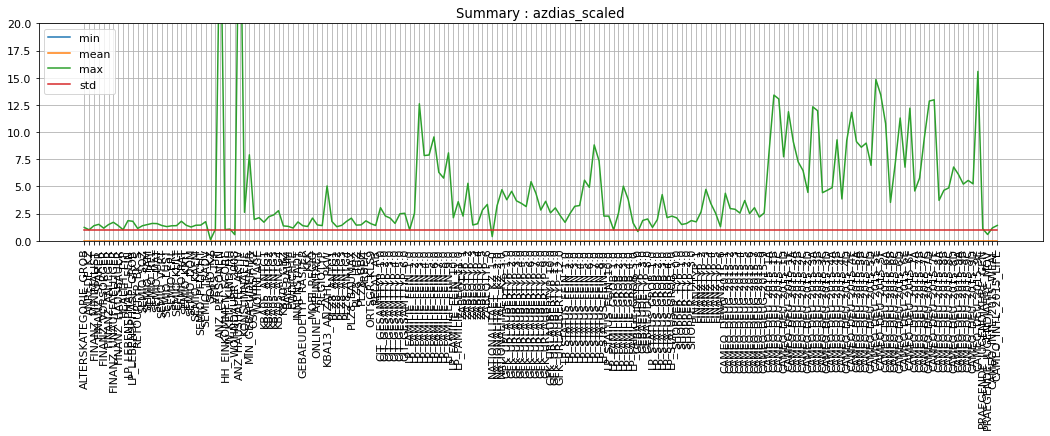

In [52]:
title = "Summary : azdias_scaled"
fig = plot_summary(azdias_scaled, title,figsize=(18,4),fontsize=11)
plt.figure(fig)
plt.ylim((0,20))

### The data size is too large.

In [53]:
azdias_scaled.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 573234 entries, 0 to 573233
Columns: 189 entries, ALTERSKATEGORIE_GROB to CAMEO_INTL_2015_LIFE
dtypes: float64(189)
memory usage: 826.6 MB


<a id="mokuji_2_7"></a>
### [2-7. Cleaning Function](#mokuji_0)

I create a cleaning function `clean_data()` and check the results.

In [54]:
def clean_data(df, feat_info, my_dict, col_names_to_drop):
    """
    Perform feature trimming, re-encoding, and engineering for demographics data
    
    INPUT:  Demographics DataFrame
    OUTPUT: Trimmed and cleaned demographics DataFrame
    """
    # Converts missing_or_unknown to nan.
    print("Step-1 : conv_miss_to_nan")
    df    = conv_miss_to_nan(feat_info, df)
    print("    df.shape = ", df.shape)

    # Removes columns which have nans over threshold.
    print("Step-2 : remove_cols_with_nan")
    df = df.drop(col_names_to_drop, axis=1)        
    
    # Removes rows which have nans over threshold.
    print("Step-3 : remove_rows_with_nan")
    df, _ = remove_rows_with_nan(df, thresh_percentage=0.1)
    print("    df.shape = ", df.shape)
    
    # Encode Categorical data
    print("Step-4 : encode_categorical")
    categorical_features_all = list(feat_info[feat_info["type"]=="categorical"].attribute)
    categorical_features_now = set(list(df.columns)) & set(categorical_features_all)
    df = encode_categorical(feat_info, df, categorical_features_now);
    print("    df.shape = ", df.shape)
    
    # Encode Mixed data
    print("Step-5 : encode_mixed")
    df = encode_mixed(df, feat_info)
    print("    df.shape = ", df.shape)
    
    # Scale
    print("Step-6 : StandardScaler")
    std_scaler = StandardScaler()
    scaler_out = std_scaler.fit_transform(df)
    df_scaled = pd.DataFrame(scaler_out)
    df_scaled.columns = df.columns
    print("    df_scaled.shape = ", df_scaled.shape)
    
    return df_scaled

### Import new data and apply the cleaning function

In [55]:
azdias_func_check = pd.read_csv("./Data/Proj_02/Udacity_AZDIAS_Subset.csv", sep=";")
azdias_func_check = clean_data(azdias_func_check, feat_info, my_dict, col_names_to_drop)

Step-1 : conv_miss_to_nan
    df.shape =  (891221, 85)
Step-2 : remove_cols_with_nan
Step-3 : remove_rows_with_nan
    df.shape =  (573234, 76)
Step-4 : encode_categorical
    encode_categorical_two_num: shape =  (573234, 76)
    encode_categorical_two_str: shape =  (573234, 76)
    encode_categorical_mul_level: shape =  (573234, 136)
    encode_categorical_mul_level: shape =  (573234, 187)
    df.shape =  (573234, 187)
Step-5 : encode_mixed
    Mixed-1 : PRAEGENDE_JUGENDJAHRE: shape =  (573234, 188)
    Mixed-2 : CAMEO_INTL_2015: shape =  (573234, 189)
    df.shape =  (573234, 189)
Step-6 : StandardScaler
    df_scaled.shape =  (573234, 189)


### Check the data size

In [56]:
display(azdias_scaled.shape)
display(azdias_func_check.shape)
print("------------------------")
display(azdias_scaled.info())
display(azdias_func_check.info())

(573234, 189)

(573234, 189)

------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 573234 entries, 0 to 573233
Columns: 189 entries, ALTERSKATEGORIE_GROB to CAMEO_INTL_2015_LIFE
dtypes: float64(189)
memory usage: 826.6 MB


None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 573234 entries, 0 to 573233
Columns: 189 entries, ALTERSKATEGORIE_GROB to CAMEO_INTL_2015_LIFE
dtypes: float64(189)
memory usage: 826.6 MB


None

<a id="mokuji_3"></a>
## [3. Dimensionality Reduction](#mokuji_0)

The size of `scaled data` is very large, so I will apply dimensionality reduction techniques.

1. I will use sklearn's [PCA](https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html) class to apply **Principal Component Anaysis** on the data.
    - This finds the vectors of maximal variance in the data. <br>
    - At first, I do not set any parameters or set a number of components that is at least half the number of features.    
2. I will check out the variance explained by each principal component as well as the cumulative variance explained.
    - I will plot the cumulative or sequential values.
    - Based on what I find from the plot, I will select a value for the number of transformed features you'll retain for the clustering part of the project.
3. Once I have made a choise for the number of components to keep,
    - I will re-fit a PCA instance to perform the decided-on transformation.

<a id="mokuji_3_1"></a>
### [3-1. PCA, First Trial](#mokuji_0)

In this section, I create two functions, and perform `PCA`.
1. `my_pca` : This function performs PCA.
2. `plot_pca_results` : This function displays cumulative and sequential values.

In [57]:
# Import libraries for PCA
from sklearn.decomposition import PCA
from time import time
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score

In [58]:
def my_pca(data, n_components=0):
    if n_components == 0:
        model_pca = PCA()
    else:
        model_pca = PCA(n_components)
    #
    data_reductioned = model_pca.fit_transform(data)
    return model_pca, data_reductioned

In [59]:
def plot_pca_results(model_pca, annotation_interval=10, fig_size=(16,5), font_size=14):
    # get pca object info
    val_components = model_pca.explained_variance_ratio_
    val_cum_sum    = np.cumsum(val_components) # Total to accumulate sequentially
    num_components = len(val_components)
    
    # Plot
    x_value = list(range(num_components))
    #
    plt.rcParams["font.size"]      = font_size
    plt.rcParams["figure.figsize"] = fig_size
    #
    plt.bar( x_value, val_components*100);
    plt.plot(x_value, val_cum_sum*100, 'ro-');
    plt.grid();
    plt.xlabel("Principal Components")
    plt.ylabel("Variance Explained [%]")
    plt.xticks(np.arange(0, num_components, annotation_interval))
    plt.title("Explained Variance Per Principal Component")
    
    # Annotation
    flag_upper = 1
    for i in range(num_components):
        #
        if i%annotation_interval == 0:
            tmp_str1 = "{0:.2f}".format(val_components[i] * 100)
            tmp_str2 = "{0:.0f}".format(val_cum_sum[i] * 100)
            #
            tmp_x   = x_value[i] + 0.2
            tmp_y2  = val_cum_sum[i] * 100
            #
            if flag_upper == 1:
                tmp_y1 = val_components[0] * 100
                flag_upper = 0
            else:
                tmp_y1 = val_components[0] * 100 / 2
                flag_upper = 1
            #
            plt.annotate(tmp_str1, (tmp_x, tmp_y1), va="bottom", ha="center", fontsize=font_size )
            
            if i != 0: # prevent overlapping of annotation
                plt.annotate(tmp_str2, (tmp_x, tmp_y2), va="bottom", ha="center", fontsize=font_size )

### Perform PCA

In [60]:
n_components = 0
model_pca, data_reductioned = my_pca(azdias_scaled, n_components)

I show the explanation of the results of PCA.

### model_pca.components_
- row = dimension
- col = columns of the original dataframe
- val = eigen vector in each dimension

### model_pca.explained_variance_
- row = dimension
- val = eigen value in each dimension

### model_pca.explained_variance_ratio_
- row = dimension
- val = contribution ratio in each dimension

---

### Check the data size

In [61]:
print("azdias_scaled.shape = ", azdias_scaled.shape)
print("model_pca.components_.shape = ", model_pca.components_.shape)
print("model_pca.explained_variance_.shape = ", model_pca.explained_variance_.shape)
print("model_pca.explained_variance_ratio_.shape = ", model_pca.explained_variance_ratio_.shape)
#
print("data_reductioned.shape      = ", data_reductioned.shape)

azdias_scaled.shape =  (573234, 189)
model_pca.components_.shape =  (189, 189)
model_pca.explained_variance_.shape =  (189,)
model_pca.explained_variance_ratio_.shape =  (189,)
data_reductioned.shape      =  (573234, 189)


### Plot PCA results

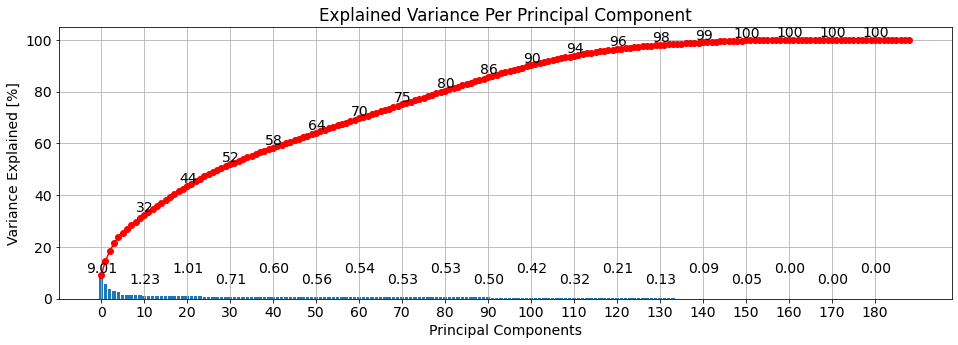

In [62]:
plot_pca_results(model_pca)

<a id="mokuji_3_2"></a>
### [3-2. Check Out the PCA Results](#mokuji_0)

### Number of Important features.
- From the plot above, if I use the `1/3` of data, I can have `about 70%` of the data information.
- So, for 1st trial, I will use `60` components for the dimensionality reduction.

### Weights of variables
- In the cells below, I check out the weight of each variable on the first few components to see if they can be interpreted in some fashion.

- As a reminder, each principal component is a unit vector which points in the direction of highest variance.
- If the inner product of two weights (or two unit vectors) is positive, increases in one tend to be associated with increases in the other.
- To constrast, if the inner product of two weights is negative, increases in one tend to be associated with decreases in the other.

### How to check out the PCA results
- I will map each weight to their corresponding feature name, then sort the features according to weight.
- I use the data dictionary `my_dict` to help me understand (1)most prominent features, (2)their relationships, and (3)what a positive or negative value on the principal component might indicate.

In [63]:
my_dict.head()

,id_1,id_2,id_3,attribute,explanation
0,1,1,101,AGER_TYP,Best-ager typology
1,1,2,102,ALTERSKATEGORIE_GROB,Estimated age based on given name analysis
2,1,3,103,ANREDE_KZ,Gender
3,1,4,104,CJT_GESAMTTYP,Customer-Journey-Typology: preferred informati...
4,1,5,105,FINANZ_MINIMALIST,"Financial typology, for each dimension:"


### I create a function which translates a PCA model to a DataFrame.

In [64]:
def trans_pca_to_df(model_pca, feature_names):
    n_components = len(model_pca.components_)
    index_name   = ["PCA_Dim_Id_{}".format(i) for i in range(n_components)]
    #
    data_for_df_1 = np.round(model_pca.components_, 4)
    data_for_df_2 = model_pca.explained_variance_ratio_.reshape(n_components,1)
    #
    df_1       = pd.DataFrame(data_for_df_1, columns=feature_names)
    df_1.index = index_name
    #
    df_2       = pd.DataFrame(data_for_df_2, columns=["Explained_Variance"])
    df_2.index = index_name
    #
    return pd.concat([df_2, df_1], axis=1)

In [65]:
df_pca = trans_pca_to_df(model_pca, azdias_scaled.columns)
df_pca.head()

,Explained_Variance,ALTERSKATEGORIE_GROB,ANREDE_KZ,FINANZ_MINIMALIST,FINANZ_SPARER,FINANZ_VORSORGER,FINANZ_ANLEGER,FINANZ_UNAUFFAELLIGER,FINANZ_HAUSBAUER,HEALTH_TYP,LP_LEBENSPHASE_FEIN,LP_LEBENSPHASE_GROB,RETOURTYP_BK_S,SEMIO_SOZ,SEMIO_FAM,SEMIO_REL,SEMIO_MAT,SEMIO_VERT,SEMIO_LUST,SEMIO_ERL,SEMIO_KULT,SEMIO_RAT,SEMIO_KRIT,SEMIO_DOM,SEMIO_KAEM,SEMIO_PFLICHT,SEMIO_TRADV,SOHO_KZ,VERS_TYP,ANZ_PERSONEN,HH_EINKOMMEN_SCORE,W_KEIT_KIND_HH,WOHNDAUER_2008,ANZ_HAUSHALTE_AKTIV,KONSUMNAEHE,MIN_GEBAEUDEJAHR,OST_WEST_KZ,WOHNLAGE,KBA05_ANTG1,KBA05_ANTG2,KBA05_ANTG3,KBA05_ANTG4,KBA05_GBZ,BALLRAUM,EWDICHTE,INNENSTADT,GEBAEUDETYP_RASTER,KKK,MOBI_REGIO,ONLINE_AFFINITAET,REGIOTYP,KBA13_ANZAHL_PKW,PLZ8_ANTG1,PLZ8_ANTG2,PLZ8_ANTG3,PLZ8_ANTG4,PLZ8_BAUMAX,PLZ8_HHZ,PLZ8_GBZ,ARBEIT,ORTSGR_KLS9,RELAT_AB,CJT_GESAMTTYP_1.0,CJT_GESAMTTYP_2.0,CJT_GESAMTTYP_3.0,CJT_GESAMTTYP_4.0,CJT_GESAMTTYP_5.0,CJT_GESAMTTYP_6.0,LP_FAMILIE_FEIN_1.0,LP_FAMILIE_FEIN_2.0,LP_FAMILIE_FEIN_3.0,LP_FAMILIE_FEIN_4.0,LP_FAMILIE_FEIN_5.0,LP_FAMILIE_FEIN_6.0,LP_FAMILIE_FEIN_7.0,LP_FAMILIE_FEIN_8.0,LP_FAMILIE_FEIN_9.0,LP_FAMILIE_FEIN_10.0,LP_FAMILIE_FEIN_11.0,ZABEOTYP_1,ZABEOTYP_2,ZABEOTYP_3,ZABEOTYP_4,ZABEOTYP_5,ZABEOTYP_6,NATIONALITAET_KZ_1.0,NATIONALITAET_KZ_2.0,NATIONALITAET_KZ_3.0,GFK_URLAUBERTYP_1.0,GFK_URLAUBERTYP_2.0,GFK_URLAUBERTYP_3.0,GFK_URLAUBERTYP_4.0,GFK_URLAUBERTYP_5.0,GFK_URLAUBERTYP_6.0,GFK_URLAUBERTYP_7.0,GFK_URLAUBERTYP_8.0,GFK_URLAUBERTYP_9.0,GFK_URLAUBERTYP_10.0,GFK_URLAUBERTYP_11.0,GFK_URLAUBERTYP_12.0,LP_STATUS_FEIN_1.0,LP_STATUS_FEIN_2.0,LP_STATUS_FEIN_3.0,LP_STATUS_FEIN_4.0,LP_STATUS_FEIN_5.0,LP_STATUS_FEIN_6.0,LP_STATUS_FEIN_7.0,LP_STATUS_FEIN_8.0,LP_STATUS_FEIN_9.0,LP_STATUS_FEIN_10.0,LP_FAMILIE_GROB_1.0,LP_FAMILIE_GROB_2.0,LP_FAMILIE_GROB_3.0,LP_FAMILIE_GROB_4.0,LP_FAMILIE_GROB_5.0,GEBAEUDETYP_1.0,GEBAEUDETYP_3.0,GEBAEUDETYP_8.0,LP_STATUS_GROB_1.0,LP_STATUS_GROB_2.0,LP_STATUS_GROB_3.0,LP_STATUS_GROB_4.0,LP_STATUS_GROB_5.0,SHOPPER_TYP_0.0,SHOPPER_TYP_1.0,SHOPPER_TYP_2.0,SHOPPER_TYP_3.0,FINANZTYP_1,FINANZTYP_2,FINANZTYP_3,FINANZTYP_4,FINANZTYP_5,FINANZTYP_6,CAMEO_DEUG_2015_1,CAMEO_DEUG_2015_2,CAMEO_DEUG_2015_3,CAMEO_DEUG_2015_4,CAMEO_DEUG_2015_5,CAMEO_DEUG_2015_6,CAMEO_DEUG_2015_7,CAMEO_DEUG_2015_8,CAMEO_DEUG_2015_9,CAMEO_DEU_2015_1A,CAMEO_DEU_2015_1B,CAMEO_DEU_2015_1C,CAMEO_DEU_2015_1D,CAMEO_DEU_2015_1E,CAMEO_DEU_2015_2A,CAMEO_DEU_2015_2B,CAMEO_DEU_2015_2C,CAMEO_DEU_2015_2D,CAMEO_DEU_2015_3A,CAMEO_DEU_2015_3B,CAMEO_DEU_2015_3C,CAMEO_DEU_2015_3D,CAMEO_DEU_2015_4A,CAMEO_DEU_2015_4B,CAMEO_DEU_2015_4C,CAMEO_DEU_2015_4D,CAMEO_DEU_2015_4E,CAMEO_DEU_2015_5A,CAMEO_DEU_2015_5B,CAMEO_DEU_2015_5C,CAMEO_DEU_2015_5D,CAMEO_DEU_2015_5E,CAMEO_DEU_2015_5F,CAMEO_DEU_2015_6A,CAMEO_DEU_2015_6B,CAMEO_DEU_2015_6C,CAMEO_DEU_2015_6D,CAMEO_DEU_2015_6E,CAMEO_DEU_2015_6F,CAMEO_DEU_2015_7A,CAMEO_DEU_2015_7B,CAMEO_DEU_2015_7C,CAMEO_DEU_2015_7D,CAMEO_DEU_2015_7E,CAMEO_DEU_2015_8A,CAMEO_DEU_2015_8B,CAMEO_DEU_2015_8C,CAMEO_DEU_2015_8D,CAMEO_DEU_2015_9A,CAMEO_DEU_2015_9B,CAMEO_DEU_2015_9C,CAMEO_DEU_2015_9D,CAMEO_DEU_2015_9E,PRAEGENDE_JUGENDJAHRE_GEN,PRAEGENDE_JUGENDJAHRE_MOV,CAMEO_INTL_2015_WEAL,CAMEO_INTL_2015_LIFE
PCA_Dim_Id_0,0.090128,-0.1107,-0.0053,-0.1873,0.1328,-0.1065,0.0703,0.0745,0.1317,0.0306,-0.1385,-0.1247,-0.0325,0.0322,0.0676,0.0962,0.0731,-0.0294,-0.0813,-0.0744,0.0636,0.0843,0.0072,0.0160,0.0280,0.1019,0.0907,0.0022,-0.0152,-0.0901,0.1706,0.0388,-0.0652,0.1095,-0.1247,-0.0277,0.0461,-0.0543,-0.1803,0.0134,0.1111,0.1190,-0.1696,-0.0882,0.1405,-0.1182,-0.0903,0.0360,-0.1923,-0.0337,0.0572,-0.0593,-0.1710,0.1141,0.1692,0.1642,0.1619,0.0304,-0.1265,0.1062,0.1429,0.0967,-0.0274,-0.0559,0.0200,0.0304,0.0003,0.0207,0.0942,-0.0317,0.0082,0.0091,0.0021,-0.0006,-0.0088,-0.0210,-0.0054,-0.0520,-0.0491,-0.0849,-0.0382,-0.0409,0.0438,0.0858,0.0386,-0.0621,0.0520,0.0308,-0.0155,-0.0073,-0.0183,0.0043,-0.0263,-0.0303,-0.0431,0.0005,0.0037,-0.0056,0.0266,0.0661,0.1145,0.1143,0.0124,-0.0160,-0.0129,-0.0235,-0.0136,-0.0123,-0.1007,-0.1126,0.0942,-0.0317,0.0107,-0.0201,-0.0753,-0.0838,0.0610,0.

### I create functions to get information from `my_dict` and the results of PCA.

In [66]:
def get_explanation_from_my_dict(my_dict, feature_name):
    ser_target = my_dict[my_dict["attribute"] == feature_name]
    
    # Error treatment for the one-hot encoded features whose names are modified
    if len(ser_target.id_1) == 0:
        pos_last = feature_name.rfind("_")
        feature_name_original = feature_name[:pos_last]
        ser_target = my_dict[my_dict["attribute"] == feature_name_original]
    #
    tmp_str = "{}-{} : {} : {}".format(ser_target.id_1.values, ser_target.id_2.values, feature_name, ser_target.explanation.values)
    tmp_str = tmp_str.replace("[","")
    tmp_str = tmp_str.replace("]","")
    return tmp_str

In [67]:
get_explanation_from_my_dict(my_dict, "AGER_TYP")

"1-1 : AGER_TYP : 'Best-ager typology'"

In [68]:
def print_pca_res(df_pca, my_dict, dimension_id, num_features_to_print=10):
    """
    dimension_id = row id of df_pca to print
    num_features_to_print = column num of df_pca to print
    """
    ser_target   = df_pca.iloc[dimension_id, :].copy()
    ser_target.sort_values(ascending=False, inplace=True)
    n_components = ser_target.shape[0]
    #
    positive_list = []
    negative_list = []
    #
    print("----------------------------")
    print("Dimension_{}: Positive Top-{}".format(dimension_id, num_features_to_print))
    print("[ranking/ contribution ratio in each dimension/ name/ explanation ]")
    print("----------------------------")
    #
    for i in range(num_features_to_print):
        id = i
        tmp_ranking = id + 1
        tmp_name    = ser_target.index[id]
        tmp_value   = np.round(ser_target.values[id], 3)
        tmp_explanation = get_explanation_from_my_dict(my_dict, tmp_name)
        #
        tmp_list = [tmp_ranking, tmp_value, tmp_name, tmp_explanation]
        print(tmp_list)
    #
    print("----------------------------")
    print("Dimension_{}: Negative Top-{}".format(dimension_id, num_features_to_print))
    print("[ranking/ contribution ratio in each dimension/ name/ explanation ]")
    print("----------------------------")
    #
    for i in range(num_features_to_print):
        id = (n_components-1) - i
        tmp_ranking = id + 1
        tmp_name    = ser_target.index[id]
        tmp_value   = np.round(ser_target.values[id], 3)
        tmp_explanation = get_explanation_from_my_dict(my_dict, tmp_name)
        #
        tmp_list = [tmp_ranking, tmp_value, tmp_name, tmp_explanation]
        print(tmp_list)
    #

### I show each weight to their corresponding feature name : Dimension ID=0

- The positive vectors have relation to the amount of money which people have.
- The negative vectors have relation to how to use money for movement pattern of houses and types of houses to live.

In [69]:
print_pca_res(df_pca, my_dict, dimension_id=0, num_features_to_print=5)

----------------------------
Dimension_0: Positive Top-5
[ranking/ contribution ratio in each dimension/ name/ explanation ]
----------------------------
[1, 0.183, 'LP_STATUS_GROB_1.0', "1-16 : LP_STATUS_GROB_1.0 : 'Social status, rough scale'"]
[2, 0.171, 'HH_EINKOMMEN_SCORE', "2-4 : HH_EINKOMMEN_SCORE : 'Estimated household net income'"]
[3, 0.169, 'PLZ8_ANTG3', "8-4 : PLZ8_ANTG3 : 'Number of 6-10 family houses in the PLZ8 region'"]
[4, 0.169, 'CAMEO_INTL_2015_WEAL', "4-3 : CAMEO_INTL_2015_WEAL : 'German CAMEO: Wealth / Life Stage Typology, mapped to international code'"]
[5, 0.164, 'PLZ8_ANTG4', "8-5 : PLZ8_ANTG4 : 'Number of 10+ family houses in the PLZ8 region'"]
----------------------------
Dimension_0: Negative Top-5
[ranking/ contribution ratio in each dimension/ name/ explanation ]
----------------------------
[190, -0.192, 'MOBI_REGIO', "7-3 : MOBI_REGIO : 'Movement patterns'"]
[189, -0.187, 'FINANZ_MINIMALIST', "1-5 : FINANZ_MINIMALIST : 'Financial typology, for each dimens

### I show each weight to their corresponding feature name : Dimension ID=1

- The positive vectors have relation to the thinking and beliefs about money.
- The negative vectors have relation to the amount of money which people have. 

In [70]:
print_pca_res(df_pca, my_dict, dimension_id=1, num_features_to_print=5)

----------------------------
Dimension_1: Positive Top-5
[ranking/ contribution ratio in each dimension/ name/ explanation ]
----------------------------
[1, 0.225, 'ALTERSKATEGORIE_GROB', "1-2 : ALTERSKATEGORIE_GROB : 'Estimated age based on given name analysis'"]
[2, 0.203, 'FINANZ_VORSORGER', "1-5 : FINANZ_VORSORGER : 'Financial typology, for each dimension:'"]
[3, 0.193, 'ZABEOTYP_3', "1-25 : ZABEOTYP_3 : 'Energy consumption typology'"]
[4, 0.178, 'SEMIO_ERL', "1-20 : SEMIO_ERL : 'Personality typology, for each dimension:'"]
[5, 0.156, 'RETOURTYP_BK_S', "1-19 : RETOURTYP_BK_S : 'Return type'"]
----------------------------
Dimension_1: Negative Top-5
[ranking/ contribution ratio in each dimension/ name/ explanation ]
----------------------------
[190, -0.228, 'PRAEGENDE_JUGENDJAHRE_GEN', '1-18 : PRAEGENDE_JUGENDJAHRE_GEN : "Dominating movement of person\'s youth (avantgarde vs. mainstream; east vs. west)"']
[189, -0.213, 'SEMIO_REL', "1-20 : SEMIO_REL : 'Personality typology, for ea

<a id="mokuji_3_3"></a>
### [3-3. PCA, Re-Fit](#mokuji_0)

I use top 60 components of PCA to create a PCA model `pca60`.

In [71]:
model_pca5,  res_pca5  = my_pca(azdias_scaled, n_components=5)
model_pca60, res_pca60 = my_pca(azdias_scaled, n_components=60)

In [72]:
print("res_pca60.shape = ", res_pca60.shape)
print("type(res_pca60) = ", type(res_pca60))
print("---")
print("res_pca60[:2,:] = ", res_pca60[:2,:])

res_pca60.shape =  (573234, 60)
type(res_pca60) =  <class 'numpy.ndarray'>
---
res_pca60[:2,:] =  [[ 4.77502152 -3.26898458 -3.24496857  1.58781383 -0.38864538  1.55436504
  -1.05630455 -0.8349061   0.75650629  3.27783306 -2.36305526 -1.08027109
  -2.13052522  0.61154773 -0.04207495  1.16116369  2.39731968  4.52746527
   1.49350093  1.11906073 -1.19752219 -0.8919087   1.27384158  0.4149591
  -1.26509069 -1.83582106 -0.7209844   1.51838996 -0.82365788 -0.60405742
  -2.96775514 -2.28842611  1.8406322   1.77070933 -0.91111173 -2.58842367
   1.7006814  -0.92708645  2.18853352  0.45363537 -1.32693488  2.40967159
   1.63436506  2.88460801 -0.41674123  0.50356491 -1.3745545   1.80115983
   1.93455131 -0.34642529  2.15295983  0.19540495 -1.46012078  0.1086279
   2.12486061 -0.46767534  0.64963265  1.89833801  0.24672574 -1.73631867]
 [ 0.09291564 -0.26034893 -3.47516974 -1.81676227  3.56030793  1.54615929
  -1.20471484 -0.06824539 -1.36915372 -0.67669647 -1.14504866  0.8125439
  -0.09004276 -1

<a id="mokuji_4"></a>
## [4. Clusterling](#mokuji_0)

I've assessed and cleaned the demographics, then scaled and transformed them.
Now it's time to see how the data clusters in the principal components space.

In [73]:
# Import k-means library
from sklearn.cluster import KMeans

### To decide the number of clusters, I will perform a parameter study.

In [74]:
def get_kmeans_model_and_score(pca_result, n_clusters):
    model = KMeans(n_clusters=n_clusters)
    model.fit(pca_result)
    return np.abs(model.score(pca_result)), model

### To perform a parameter study, I create a toy dataset whose size is reduced to 25% .

In [75]:
row_num_all   = res_pca60.shape[0]
row_num_25per = int(row_num_all * 0.25)
row_random    = np.random.choice(row_num_all, row_num_25per)
res_pca60_sample = res_pca60[row_random, :]
#
print("res_pca60.shape        = ", res_pca60.shape)
print("res_pca60_sample.shape = ", res_pca60_sample.shape)

res_pca60.shape        =  (573234, 60)
res_pca60_sample.shape =  (143308, 60)


In [76]:
losses_kmeans = []
models_kmeans = []
cpu_times = []
clusters  = [2,5,10,15,20,25,30,40,60,100,200]
#
for cluster in clusters:
    time_s = time()
    print("Cluster = ", cluster)
    tmp_score, tmp_model = get_kmeans_model_and_score(res_pca60_sample, cluster)
    time_e = time()
    tmp_time = time_e - time_s
    #
    losses_kmeans.append(tmp_score)
    models_kmeans.append(tmp_model)
    cpu_times.append(tmp_time)
    print("    cpu_time = {:.3f}[s]".format(tmp_time))

Cluster =  2
    cpu_time = 0.560[s]
Cluster =  5
    cpu_time = 1.525[s]
Cluster =  10
    cpu_time = 3.167[s]
Cluster =  15
    cpu_time = 7.391[s]
Cluster =  20
    cpu_time = 8.221[s]
Cluster =  25
    cpu_time = 11.455[s]
Cluster =  30
    cpu_time = 12.640[s]
Cluster =  40
    cpu_time = 19.847[s]
Cluster =  60
    cpu_time = 28.072[s]
Cluster =  100
    cpu_time = 50.088[s]
Cluster =  200
    cpu_time = 94.154[s]


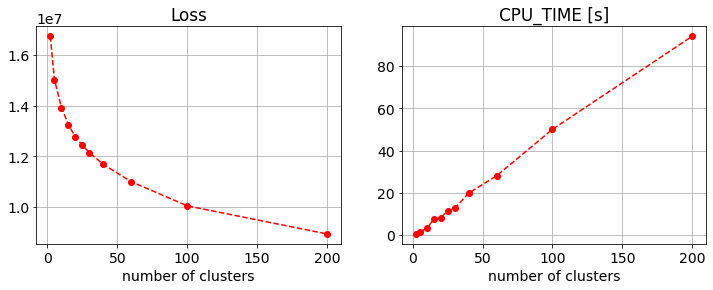

In [77]:
plt.rcParams['figure.figsize'] = (12,4)
#
plt.subplot(1,2,1)
plt.plot(clusters, losses_kmeans,'ro--' );
plt.xlabel('number of clusters')
plt.title('Loss')
plt.grid()
#
plt.subplot(1,2,2)
plt.plot(clusters, cpu_times,'ro--' );
plt.xlabel('number of clusters')
plt.title('CPU_TIME [s]')
plt.grid()

### From the idea of the [K-Means elbow method ](https://predictivehacks.com/k-means-elbow-method-code-for-python/), I select `40` as a number of clusters.

In [78]:
time_s = time()
selected_n_clusters = 40
loss_kmeans, model_kmeans = get_kmeans_model_and_score(res_pca60, selected_n_clusters)
time_e = time()
print("cpu time[s] = ", (time_e - time_s))

cpu time[s] =  72.27088117599487


In [79]:
pred_kmeans = model_kmeans.predict(res_pca60)

### `pred_kmeans` is the cluster index of each row (each person).
- All of the person is devided to the 40 groups.

res_pca60.shape   =  (573234, 60)
pred_kmeans.shape =  (573234,)
pred_kmeans       =  [10 13 23 ... 12 12 17]


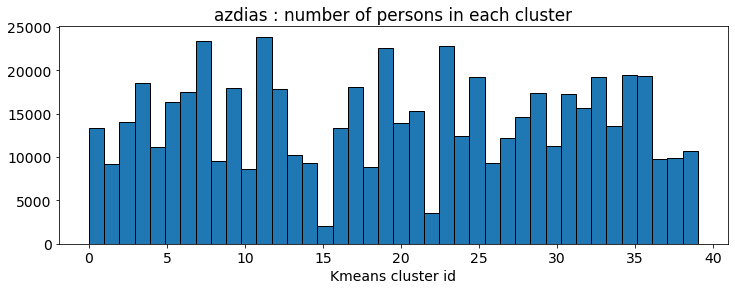

In [80]:
print("res_pca60.shape   = ", res_pca60.shape)
print("pred_kmeans.shape = ", pred_kmeans.shape)
print("pred_kmeans       = ", pred_kmeans)
#
plt.rcParams['figure.figsize'] = (12,4);
plt.hist(pred_kmeans, bins=40, ec="black");
plt.xlabel("Kmeans cluster id");
plt.title("azdias : number of persons in each cluster");

<a id="mokuji_4_2"></a>
### [4-2. Apply All Steps to the Customer Data](#mokuji_0)

Now that I have clusters and cluster centers for the general population, it's time to see how the customer data maps on to those clusters.




### Load the customer datase

In [81]:
customers = pd.read_csv("Data/Proj_02/Udacity_CUSTOMERS_Subset.csv", sep=";")
customers.head()

,AGER_TYP,ALTERSKATEGORIE_GROB,ANREDE_KZ,CJT_GESAMTTYP,FINANZ_MINIMALIST,FINANZ_SPARER,FINANZ_VORSORGER,FINANZ_ANLEGER,FINANZ_UNAUFFAELLIGER,FINANZ_HAUSBAUER,FINANZTYP,GEBURTSJAHR,GFK_URLAUBERTYP,GREEN_AVANTGARDE,HEALTH_TYP,LP_LEBENSPHASE_FEIN,LP_LEBENSPHASE_GROB,LP_FAMILIE_FEIN,LP_FAMILIE_GROB,LP_STATUS_FEIN,LP_STATUS_GROB,NATIONALITAET_KZ,PRAEGENDE_JUGENDJAHRE,RETOURTYP_BK_S,SEMIO_SOZ,SEMIO_FAM,SEMIO_REL,SEMIO_MAT,SEMIO_VERT,SEMIO_LUST,SEMIO_ERL,SEMIO_KULT,SEMIO_RAT,SEMIO_KRIT,SEMIO_DOM,SEMIO_KAEM,SEMIO_PFLICHT,SEMIO_TRADV,SHOPPER_TYP,SOHO_KZ,TITEL_KZ,VERS_TYP,ZABEOTYP,ALTER_HH,ANZ_PERSONEN,ANZ_TITEL,HH_EINKOMMEN_SCORE,KK_KUNDENTYP,W_KEIT_KIND_HH,WOHNDAUER_2008,ANZ_HAUSHALTE_AKTIV,ANZ_HH_TITEL,GEBAEUDETYP,KONSUMNAEHE,MIN_GEBAEUDEJAHR,OST_WEST_KZ,WOHNLAGE,CAMEO_DEUG_2015,CAMEO_DEU_2015,CAMEO_INTL_2015,KBA05_ANTG1,KBA05_ANTG2,KBA05_ANTG3,KBA05_ANTG4,KBA05_BAUMAX,KBA05_GBZ,BALLRAUM,EWDICHTE,INNENSTADT,GEBAEUDETYP_RASTER,KKK,MOBI_REGIO,ONLINE_AFFINITAET,REGIOTYP,KBA13_ANZAHL_PKW,PLZ8_ANTG1,PLZ8_ANTG2,PLZ8_ANTG3,PLZ8_ANTG4,PLZ8_BAUMAX,PLZ8_HHZ,PLZ8_GBZ,ARBEIT,ORTSGR_KLS9,RELAT_AB
0,2,4,1,5.0,5,1,5,1,2,2,2,0,4.0,1,1,20.0,5.0,2.0,2.0,10.0,5.0,1,4,5.0,6,5,2,6,6,7,3,4,1,3,1,1,2,1,3,0.0,0.0,1,3,10.0,2.0,0.0,1.0,NaN,6.0,9.0,1.0,0.0,1.0,5.0,1992.0,W,7.0,1,1A,13,2.0,2.0,0.0,0.0,0.0,4.0,3.0,2.0,4.0,4.0,1.0,4.0,3.0,1.0,1201.0,3.0,3.0,1.0,0.0,1.0,5.0,5.0,1.0,2.0,1.0
1,-1,4,1,NaN,5,1,5,1,3,2,2,0,NaN,0,1,NaN,NaN,NaN,NaN,NaN,NaN,1,0,NaN,3,6,2,6,7,5,3,4,1,3,3,2,4,1,3,0.0,0.0,1,3,11.0,3.0,0.0,NaN,NaN,0.0,9.0,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,-1,4,2,2.0,5,1,5,1,4,4,2,0,3.0,1,2,13.0,3.0,1.0,1.0,10.0,5.0,1,4,5.0,2,2,1,3,3,7,7,1,2,7,5,6,4,1,1,0.0,0.0,2,3,6.0,1.0,0.0,1.0,NaN,6.0,9.0,1.0,0.0,8.0,1.0,1992.0,W,2.0,5,5D,34,2.0,2.0,0.0,0.0,0.0,3.0,7.0,4.0,1.0,3.0,3.0,3.0,1.0,7.0,433.0,2.0,3.0,3.0,1.0,3.0,3.0,2.0,3.0,5.0,3.0
3,1,4,1,2.0,5,1,5,2,1,2,6,0,10.0,0,2,0.0,0.0,0.0,0.0,9.0,4.0,1,1,3.0,6,5,3,4,7,5,3,4,3,3,3,3,3,4,0,0.0,0.0,1,1,8.0,0.0,0.0,4.0,NaN,NaN,9.0,0.0,NaN,2.0,2.0,1992.0,W,7.0,4,4C,24,3.0,0.0,0.0,0.0,1.0,4.0,7.0,1.0,7.0,4.0,3.0,4.0,2.0,6.0,755.0,3.0,2.0,1.0,0.0,1.0,3.0,4.0,1.0,3.0,1.0
4,-1,3,1,6.0,3,1,4,4,5,2,2,1960,2.0,0,3,31.0,10.0,10.0,5.0,1.0,1.0,1,8,5.0,4,5,4,6,5,6,4,5,5,3,5,2,5,4,1,0.0,0.0,2,1,20.0,4.0,0.0,6.0,2.0,2.0,9.0,7.0,0.0,3.0,1.0,1992.0,W,3.0,7,7B,41,0.0,3.0,2.0,0.0,0.0,3.0,3.0,4.0,4.0,3.0,4.0,3.0,5.0,7.0,513.0,2.0,4.0,2.0,1.0,2.0,3.0,3.0,3.0,5.0,1.0


### Clean the customer dataset

In [82]:
customers = clean_data(customers, feat_info, my_dict, col_names_to_drop)

Step-1 : conv_miss_to_nan
    df.shape =  (191652, 85)
Step-2 : remove_cols_with_nan
Step-3 : remove_rows_with_nan
    df.shape =  (112645, 76)
Step-4 : encode_categorical
    encode_categorical_two_num: shape =  (112645, 76)
    encode_categorical_two_str: shape =  (112645, 76)
    encode_categorical_mul_level: shape =  (112645, 136)
    encode_categorical_mul_level: shape =  (112645, 187)
    df.shape =  (112645, 187)
Step-5 : encode_mixed
    Mixed-1 : PRAEGENDE_JUGENDJAHRE: shape =  (112645, 188)
    Mixed-2 : CAMEO_INTL_2015: shape =  (112645, 189)
    df.shape =  (112645, 189)
Step-6 : StandardScaler
    df_scaled.shape =  (112645, 189)


In [83]:
customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112645 entries, 0 to 112644
Columns: 189 entries, ALTERSKATEGORIE_GROB to CAMEO_INTL_2015_LIFE
dtypes: float64(189)
memory usage: 162.4 MB


### Apply PCA to the `customers` dataset

In [84]:
res_pca_customers = model_pca60.transform(customers)
pred_kmeans_customers = model_kmeans.predict(res_pca_customers)

<a id="mokuji_4_3"></a>
### [4-3. Compare Customer Data to Demographics Data](#mokuji_0)

At this point, I have clustered the dataset based on demographics of the general population of Germany(= `azdias`), and seen how the customer data for a mail-order sales company maps onto those demographic clusters.

In this final substep, I will compare the two cluster distributions to see where the strongest customer base for the company is.

I will consider the proportion of persons in each cluster for the general population, and the proportions for the customers.

If we think the company's customer base to be universal, then the cluster assignment proportions should be fairly similar between the two.

### Compair the number of persons in each cluster

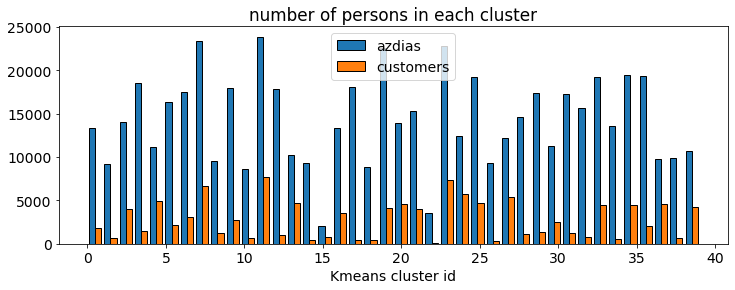

In [85]:
plt.rcParams['figure.figsize'] = (12,4);
plt.hist([pred_kmeans, pred_kmeans_customers], bins=40, ec="black", label=["azdias", "customers"]);
plt.xlabel("Kmeans cluster id");
plt.title("number of persons in each cluster");
plt.legend(loc = "upper center")

### Compair the number of persons in each cluster using `Normalization`

To investigate the similarity of the cluster assignment proportion between the two, I will show two graphs.
1. normalized number of persons
2. ratio of number of persons of the two dataset

From the graph below, it is found that there are differences of the cluster assignment proportion.

In [86]:
def get_normalized_hist(data, bins):
    sum = np.sum(data)
    counts, _ = np.histogram(data, bins=bins)
    return (counts/sum)

In [87]:
pred_kmeans_azdias_norm    = get_normalized_hist(pred_kmeans, 40)
pred_kmeans_customers_norm = get_normalized_hist(pred_kmeans_customers, 40)

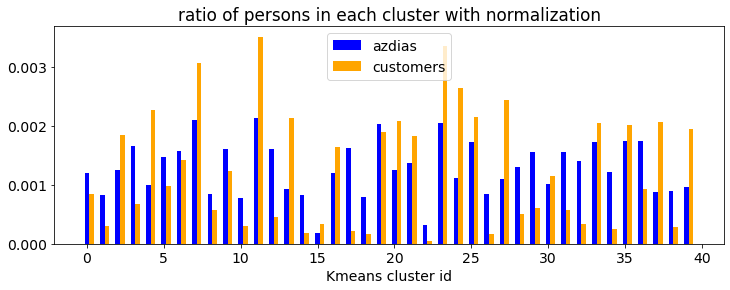

In [88]:
bar_x1 = np.arange(0,40)
bar_x2 = bar_x1 + 0.3
plt.rcParams['figure.figsize'] = (12,4);
plt.bar(bar_x1, pred_kmeans_azdias_norm,    color="blue",   width=0.3, label="azdias", align="center")
plt.bar(bar_x2, pred_kmeans_customers_norm, color="orange", width=0.3, label="customers", align="center")
plt.xlabel("Kmeans cluster id");
plt.title("ratio of persons in each cluster with normalization");
plt.legend(loc = "upper center")

Max Ratio Cluster ID = 24 / ratio = 2.370
Min Ratio Cluster ID = 17 / ratio = 0.135


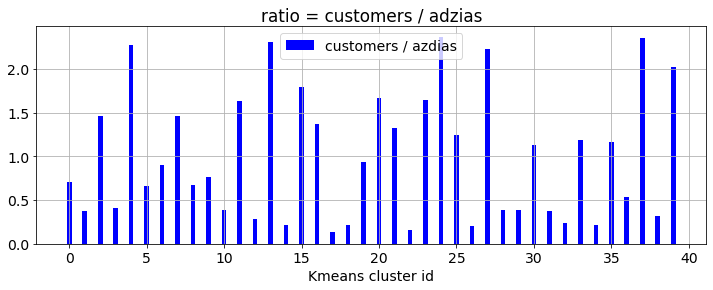

In [89]:
bar_x1 = np.arange(0,40)
bar_x2 = bar_x1 + 0.3
pred_kmeans_comp = pred_kmeans_customers_norm / pred_kmeans_azdias_norm
max_cluster_id = np.argmax(pred_kmeans_comp)
min_cluster_id = np.argmin(pred_kmeans_comp)
plt.rcParams['figure.figsize'] = (12,4);
plt.bar(bar_x1, pred_kmeans_comp,    color="blue",   width=0.3, label="customers / azdias", align="center")
plt.xlabel("Kmeans cluster id");
plt.title("ratio = customers / adzias");
plt.legend(loc = "upper center")
plt.grid()
#
print("Max Ratio Cluster ID = {} / ratio = {:.3f}".format(max_cluster_id, pred_kmeans_comp[max_cluster_id]))
print("Min Ratio Cluster ID = {} / ratio = {:.3f}".format(min_cluster_id, pred_kmeans_comp[min_cluster_id]))

### What kinds of people are part of a cluster that is overrepresented in the customer data compared to the general population(= `azdias`) ?

1. Selecte a cluster id (= `target_cluster_id`) which is overrepresented in `customer` compared to `azdias`.
  - Select one from 40 clusters of the KMeans result.
  
2. Get a cluster center (= `pca_cluster_center`) which has information about principal components.

3. Transform principal components to the scaled original value.(`pca_cluster_center` --> `df_reversed`)<br>
  - use `pca.inverse_transform()`

4. Investigate top 2 principal components Id (= `top_pca_ids`) of `pca_cluster_center`.

5. For top 2 components(`top_pca_ids`), get each features weight( = importance )<br>

  5-1. get each principal component
    - the row size of principal components = 1
    - the col size of principal components = number of features

  5-2. `weight` = `principal components` * `df_reversed`

6. Using positive and negative top 5 `weight`, I will investigate which features are important.

In [90]:
print(model_kmeans.cluster_centers_.shape)
print(model_kmeans.cluster_centers_)

(40, 60)
[[-4.57660394e+00  2.93774511e+00 -1.59514029e+00 ... -2.19336893e-02
   1.20634661e-01 -9.33181372e-03]
 [ 4.02396641e+00  2.89713692e+00  7.22266626e-01 ...  1.53448419e-01
  -2.66698924e-01 -4.98374245e-02]
 [-2.63214979e+00 -4.48133691e+00  4.29213608e-01 ... -1.88929461e-03
   1.52241905e-01  7.23848221e-02]
 ...
 [-2.45331964e+00  1.05544349e+00 -3.75602508e-01 ... -1.17156489e-01
   1.26086118e-01  2.11064068e-01]
 [-1.34309372e+00 -4.68316321e+00 -2.99441729e+00 ...  1.12378820e-02
   1.38715187e-02 -1.20238112e-01]
 [-4.77610924e+00  4.33264113e-01  7.18356370e-01 ... -1.49124682e-01
  -1.19749639e+00  4.59713753e-01]]


### 4-3-1. Selecte a cluster id which is overrepresented in customer compared to azdias.

In [91]:
target_cluster_id  = max_cluster_id

### 4-3-2. Get a cluster center which has information about principal components.

In [92]:
pca_cluster_center = model_kmeans.cluster_centers_[target_cluster_id]
ser_pca_cluster_center = pd.Series(pca_cluster_center)
ser_pca_cluster_center.sort_values(ascending=False, inplace=True)
#
print("pca_cluster_center.shape = ", pca_cluster_center.shape)
display(ser_pca_cluster_center.head())
#
top_pca_ids = list(ser_pca_cluster_center.index[:2])
print("top_pca_ids = ", top_pca_ids)

pca_cluster_center.shape =  (60,)


4     3.171334
20    2.784108
17    2.711161
21    1.630994
3     1.328955
dtype: float64

top_pca_ids =  [4, 20]


### 4-3-3. Transform principal components to the scaled original value.

In [93]:
ser_reversed = model_pca60.inverse_transform(ser_pca_cluster_center)

In [94]:
df_reversed = pd.DataFrame(ser_reversed, columns=["cluster_27"]).round()
df_reversed.index = customers.columns
display(df_reversed.head(10))

,cluster_27
ALTERSKATEGORIE_GROB,0.0
ANREDE_KZ,1.0
FINANZ_MINIMALIST,0.0
FINANZ_SPARER,-0.0
FINANZ_VORSORGER,0.0
FINANZ_ANLEGER,-1.0
FINANZ_UNAUFFAELLIGER,-0.0
FINANZ_HAUSBAUER,0.0
HEALTH_TYP,0.0
LP_LEBENSPHASE_FEIN,-0.0


### Get `numpy.ndarray` from `DataFrame`

In [95]:
values_reversed = df_reversed.iloc[:,0].values
print(values_reversed.shape)
print(type(values_reversed))

(189,)
<class 'numpy.ndarray'>


### 4-3-5. For top 2 components, get each features weight
- I select
  - 1st principal component id = 36
  - 2nd principal component id = 5
  
- To calculate the weight of each feature, I use the `df_pca` which is created in the above cell and has the principal components values.

In [96]:
df_pca2 = df_pca.drop(axis=1,columns=["Explained_Variance"], inplace=False)
display(df_pca2.head())

,ALTERSKATEGORIE_GROB,ANREDE_KZ,FINANZ_MINIMALIST,FINANZ_SPARER,FINANZ_VORSORGER,FINANZ_ANLEGER,FINANZ_UNAUFFAELLIGER,FINANZ_HAUSBAUER,HEALTH_TYP,LP_LEBENSPHASE_FEIN,LP_LEBENSPHASE_GROB,RETOURTYP_BK_S,SEMIO_SOZ,SEMIO_FAM,SEMIO_REL,SEMIO_MAT,SEMIO_VERT,SEMIO_LUST,SEMIO_ERL,SEMIO_KULT,SEMIO_RAT,SEMIO_KRIT,SEMIO_DOM,SEMIO_KAEM,SEMIO_PFLICHT,SEMIO_TRADV,SOHO_KZ,VERS_TYP,ANZ_PERSONEN,HH_EINKOMMEN_SCORE,W_KEIT_KIND_HH,WOHNDAUER_2008,ANZ_HAUSHALTE_AKTIV,KONSUMNAEHE,MIN_GEBAEUDEJAHR,OST_WEST_KZ,WOHNLAGE,KBA05_ANTG1,KBA05_ANTG2,KBA05_ANTG3,KBA05_ANTG4,KBA05_GBZ,BALLRAUM,EWDICHTE,INNENSTADT,GEBAEUDETYP_RASTER,KKK,MOBI_REGIO,ONLINE_AFFINITAET,REGIOTYP,KBA13_ANZAHL_PKW,PLZ8_ANTG1,PLZ8_ANTG2,PLZ8_ANTG3,PLZ8_ANTG4,PLZ8_BAUMAX,PLZ8_HHZ,PLZ8_GBZ,ARBEIT,ORTSGR_KLS9,RELAT_AB,CJT_GESAMTTYP_1.0,CJT_GESAMTTYP_2.0,CJT_GESAMTTYP_3.0,CJT_GESAMTTYP_4.0,CJT_GESAMTTYP_5.0,CJT_GESAMTTYP_6.0,LP_FAMILIE_FEIN_1.0,LP_FAMILIE_FEIN_2.0,LP_FAMILIE_FEIN_3.0,LP_FAMILIE_FEIN_4.0,LP_FAMILIE_FEIN_5.0,LP_FAMILIE_FEIN_6.0,LP_FAMILIE_FEIN_7.0,LP_FAMILIE_FEIN_8.0,LP_FAMILIE_FEIN_9.0,LP_FAMILIE_FEIN_10.0,LP_FAMILIE_FEIN_11.0,ZABEOTYP_1,ZABEOTYP_2,ZABEOTYP_3,ZABEOTYP_4,ZABEOTYP_5,ZABEOTYP_6,NATIONALITAET_KZ_1.0,NATIONALITAET_KZ_2.0,NATIONALITAET_KZ_3.0,GFK_URLAUBERTYP_1.0,GFK_URLAUBERTYP_2.0,GFK_URLAUBERTYP_3.0,GFK_URLAUBERTYP_4.0,GFK_URLAUBERTYP_5.0,GFK_URLAUBERTYP_6.0,GFK_URLAUBERTYP_7.0,GFK_URLAUBERTYP_8.0,GFK_URLAUBERTYP_9.0,GFK_URLAUBERTYP_10.0,GFK_URLAUBERTYP_11.0,GFK_URLAUBERTYP_12.0,LP_STATUS_FEIN_1.0,LP_STATUS_FEIN_2.0,LP_STATUS_FEIN_3.0,LP_STATUS_FEIN_4.0,LP_STATUS_FEIN_5.0,LP_STATUS_FEIN_6.0,LP_STATUS_FEIN_7.0,LP_STATUS_FEIN_8.0,LP_STATUS_FEIN_9.0,LP_STATUS_FEIN_10.0,LP_FAMILIE_GROB_1.0,LP_FAMILIE_GROB_2.0,LP_FAMILIE_GROB_3.0,LP_FAMILIE_GROB_4.0,LP_FAMILIE_GROB_5.0,GEBAEUDETYP_1.0,GEBAEUDETYP_3.0,GEBAEUDETYP_8.0,LP_STATUS_GROB_1.0,LP_STATUS_GROB_2.0,LP_STATUS_GROB_3.0,LP_STATUS_GROB_4.0,LP_STATUS_GROB_5.0,SHOPPER_TYP_0.0,SHOPPER_TYP_1.0,SHOPPER_TYP_2.0,SHOPPER_TYP_3.0,FINANZTYP_1,FINANZTYP_2,FINANZTYP_3,FINANZTYP_4,FINANZTYP_5,FINANZTYP_6,CAMEO_DEUG_2015_1,CAMEO_DEUG_2015_2,CAMEO_DEUG_2015_3,CAMEO_DEUG_2015_4,CAMEO_DEUG_2015_5,CAMEO_DEUG_2015_6,CAMEO_DEUG_2015_7,CAMEO_DEUG_2015_8,CAMEO_DEUG_2015_9,CAMEO_DEU_2015_1A,CAMEO_DEU_2015_1B,CAMEO_DEU_2015_1C,CAMEO_DEU_2015_1D,CAMEO_DEU_2015_1E,CAMEO_DEU_2015_2A,CAMEO_DEU_2015_2B,CAMEO_DEU_2015_2C,CAMEO_DEU_2015_2D,CAMEO_DEU_2015_3A,CAMEO_DEU_2015_3B,CAMEO_DEU_2015_3C,CAMEO_DEU_2015_3D,CAMEO_DEU_2015_4A,CAMEO_DEU_2015_4B,CAMEO_DEU_2015_4C,CAMEO_DEU_2015_4D,CAMEO_DEU_2015_4E,CAMEO_DEU_2015_5A,CAMEO_DEU_2015_5B,CAMEO_DEU_2015_5C,CAMEO_DEU_2015_5D,CAMEO_DEU_2015_5E,CAMEO_DEU_2015_5F,CAMEO_DEU_2015_6A,CAMEO_DEU_2015_6B,CAMEO_DEU_2015_6C,CAMEO_DEU_2015_6D,CAMEO_DEU_2015_6E,CAMEO_DEU_2015_6F,CAMEO_DEU_2015_7A,CAMEO_DEU_2015_7B,CAMEO_DEU_2015_7C,CAMEO_DEU_2015_7D,CAMEO_DEU_2015_7E,CAMEO_DEU_2015_8A,CAMEO_DEU_2015_8B,CAMEO_DEU_2015_8C,CAMEO_DEU_2015_8D,CAMEO_DEU_2015_9A,CAMEO_DEU_2015_9B,CAMEO_DEU_2015_9C,CAMEO_DEU_2015_9D,CAMEO_DEU_2015_9E,PRAEGENDE_JUGENDJAHRE_GEN,PRAEGENDE_JUGENDJAHRE_MOV,CAMEO_INTL_2015_WEAL,CAMEO_INTL_2015_LIFE
PCA_Dim_Id_0,-0.1107,-0.0053,-0.1873,0.1328,-0.1065,0.0703,0.0745,0.1317,0.0306,-0.1385,-0.1247,-0.0325,0.0322,0.0676,0.0962,0.0731,-0.0294,-0.0813,-0.0744,0.0636,0.0843,0.0072,0.0160,0.0280,0.1019,0.0907,0.0022,-0.0152,-0.0901,0.1706,0.0388,-0.0652,0.1095,-0.1247,-0.0277,0.0461,-0.0543,-0.1803,0.0134,0.1111,0.1190,-0.1696,-0.0882,0.1405,-0.1182,-0.0903,0.0360,-0.1923,-0.0337,0.0572,-0.0593,-0.1710,0.1141,0.1692,0.1642,0.1619,0.0304,-0.1265,0.1062,0.1429,0.0967,-0.0274,-0.0559,0.0200,0.0304,0.0003,0.0207,0.0942,-0.0317,0.0082,0.0091,0.0021,-0.0006,-0.0088,-0.0210,-0.0054,-0.0520,-0.0491,-0.0849,-0.0382,-0.0409,0.0438,0.0858,0.0386,-0.0621,0.0520,0.0308,-0.0155,-0.0073,-0.0183,0.0043,-0.0263,-0.0303,-0.0431,0.0005,0.0037,-0.0056,0.0266,0.0661,0.1145,0.1143,0.0124,-0.0160,-0.0129,-0.0235,-0.0136,-0.0123,-0.1007,-0.1126,0.0942,-0.0317,0.0107,-0.0201,-0.0753,-0.0838,0.0610,0.0402,0.1832,-0.0079,-0.0274,

### pick up principal components

In [97]:
pca_comp_36 = df_pca2.iloc[36, :].values
pca_comp_5  = df_pca2.iloc[5, :].values

print(pca_comp_36.shape)

(189,)


### multiply reversed values and principal components and get weights of each feature

In [98]:
ser_pca_36 = pd.Series(values_reversed * pca_comp_36)
ser_pca_5  = pd.Series(values_reversed * pca_comp_5)
#
ser_pca_36.index = customers.columns
ser_pca_5.index = customers.columns
#
ser_pca_36.sort_values(ascending=False, inplace=True)
ser_pca_5.sort_values(ascending=False, inplace=True)

In [99]:
def print_weight_and_explanation(ser, my_dict, num_disp=5):
    print("-----------------------------------------")
    print("[weight] : [explanation]")
    print("-----------------------------------------")
    col_names = ser.index
    num_row   = len(ser.index)
    #
    print("----------------- Top 5 -----------------")
    #
    for i in range(num_disp):
        col_name = col_names[i]
        weight = ser.iloc[i]
        exp = get_explanation_from_my_dict(my_dict, col_name)
        print("[{:.3f}] : [{}]".format(weight, exp))
    #
    print(" ")
    print("----------------- Tail 5 -----------------")
    #
    for i in range(num_disp):
        j = num_row - i - 1
        col_name = col_names[j]
        weight = ser.iloc[j]
        exp = get_explanation_from_my_dict(my_dict, col_name)
        print("[{:.3f}] : [{}]".format(weight, exp))        

In [100]:
print_weight_and_explanation(ser_pca_36, my_dict)

-----------------------------------------
[weight] : [explanation]
-----------------------------------------
----------------- Top 5 -----------------
[0.195] : [1-4 : CJT_GESAMTTYP_1.0 : 'Customer-Journey-Typology: preferred information and buying channels for']
[0.136] : [1-6 : FINANZTYP_2 : 'Most descriptive financial type for individual']
[0.130] : [1-16 : LP_STATUS_GROB_3.0 : 'Social status, rough scale']
[0.095] : [4-2 : CAMEO_DEU_2015_1B : 'German CAMEO: Wealth / Life Stage Typology, detailed scale']
[0.093] : [4-2 : CAMEO_DEU_2015_9D : 'German CAMEO: Wealth / Life Stage Typology, detailed scale']
 
----------------- Tail 5 -----------------
[-0.197] : [3-3 : GEBAEUDETYP_3.0 : 'Type of building (residential vs. commercial)']
[-0.135] : [7-1 : GEBAEUDETYP_RASTER : 'Ratio of residential to commercial activity']
[-0.123] : [1-8 : GFK_URLAUBERTYP_7.0 : 'Vacation habits']
[-0.099] : [4-2 : CAMEO_DEU_2015_1A : 'German CAMEO: Wealth / Life Stage Typology, detailed scale']
[-0.079] : [3

In [101]:
print_weight_and_explanation(ser_pca_5, my_dict)

-----------------------------------------
[weight] : [explanation]
-----------------------------------------
----------------- Top 5 -----------------
[0.221] : [1-16 : LP_STATUS_GROB_3.0 : 'Social status, rough scale']
[0.212] : [3-3 : GEBAEUDETYP_3.0 : 'Type of building (residential vs. commercial)']
[0.211] : [3-3 : GEBAEUDETYP_1.0 : 'Type of building (residential vs. commercial)']
[0.210] : [1-15 : LP_STATUS_FEIN_3.0 : 'Social status, fine scale']
[0.203] : [1-15 : LP_STATUS_FEIN_6.0 : 'Social status, fine scale']
 
----------------- Tail 5 -----------------
[-0.237] : [1-15 : LP_STATUS_FEIN_4.0 : 'Social status, fine scale']
[-0.112] : [9-2 : ORTSGR_KLS9 : 'Size of community']
[-0.091] : [3-7 : WOHNLAGE : 'Neighborhood quality (or rural flag)']
[-0.089] : [6-2 : EWDICHTE : 'Density of households per square kilometer']
[-0.084] : [8-8 : PLZ8_GBZ : 'Number of buildings within the PLZ8 region']


### Observation about the results above

Cluster 27 is one of the overrepresented clusters in the customer dataset compared to the general population. Looking at most 2 influencing components and their weights, the cluster represents social status and house types which they live in. 

From the `Data_Dictionary.md` and the results above, the mail-order company is recommended to focus on the next people,
- title holder-households
- new houseowners
- independents
- City Nobility